In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from filterpy.kalman import ExtendedKalmanFilter
from filterpy.common import Q_discrete_white_noise
import random

In [10]:
def bbusppg(num):     # Returns B-bus..

    linedata = linedatas(num);
    fb = linedata[:,0];  #first column 
    tb = linedata[:,1];  #2nd column 
    b = linedata[:,4];   #5th column
    nbus = int(np.max([np.max(fb),np.max(tb)]))    # no. of buses...
    nbranch = len(fb);           # no. of branches...
    bbus = np.mat(np.zeros((nbus,nbus)));

    for k in range (0,nbranch):
        bbus[int(fb[k]-1),int(tb[k]-1)] = b[k]
        bbus[int(tb[k]-1),int(fb[k]-1)] = bbus[int(fb[k]-1),int(tb[k]-1)];

    return bbus
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

In [11]:
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

def zdatas(i):

        #      |Msnt |Type | Value | From | To | Rii | 
        #---- Voltage Magnitude ------------#
        
        
    Pow_i= Pi[i];  

    zdata14   =  np.mat([[1 , 1  ,  Pow_i[0] , 1 ,   0 ,  9e-4],
             #-----------------------------------#
             #---- Real Power Injection ---------#
             [2 , 2  ,  Pow_i[1] ,  2 ,   0 ,  1e-4],
             [3 , 2 ,  Pow_i[2] ,  3 ,   0 ,  1e-4], 
             [4 , 2 ,  Pow_i[3] , 7 ,   0  , 1e-4],
             [5 , 2 ,  Pow_i[4]   , 8 ,   0  , 1e-4], 
             [6 , 2 ,  Pow_i[5] , 10 ,   0 ,  1e-4],
             [7 , 2 ,  Pow_i[6] , 11 ,   0 ,  1e-4],
             [8 , 2 ,  Pow_i[7], 12 ,   0 ,  1e-4], 
             [9 , 2 ,  Pow_i[8] , 14 ,   0 ,  1e-4],
             #------------------------------------#
             #---- Reative Power Injection -------#
             [10 , 3 ,   Pow_i[9] ,  2 ,   0 ,  1e-4],
             [11 , 3 ,   Pow_i[10] ,  3 ,   0 ,  1e-4], 
             [12 , 3 ,   Pow_i[11] , 7 ,   0  , 1e-4],
             [13 , 3 ,   Pow_i[12],  8 ,   0 ,  1e-4], 
             [14 , 3 ,  Pow_i[13] , 10 ,   0 ,  1e-4],
             [15 , 3 ,  Pow_i[14], 11 ,   0 ,  1e-4],
             [16 , 3 ,  Pow_i[15], 12 ,   0 ,  1e-4], 
             [17 , 3 ,  Pow_i[16], 14 ,   0 ,  1e-4],
             #------------------------------------#
             #------ Real Power Flow ------------- #
             [18 , 4 ,   Pow_i[17] ,  1 ,   2 ,  64e-6],
             [19 , 4 ,   Pow_i[18],  2 ,   3 ,  64e-6],
             [20 , 4 ,  Pow_i[19] ,  4 ,   2 ,  64e-6],
             [21 , 4 ,   Pow_i[20] ,  4 ,   7 ,  64e-6],
             [22 , 4 ,   Pow_i[21] ,  4 ,   9 ,  64e-6],
             [23 , 4 ,  Pow_i[22] ,  5 ,   2 ,  64e-6],
             [24 , 4 ,   Pow_i[23],  5 ,   4 ,  64e-6],
             [25 , 4 ,   Pow_i[24],  5 ,   6 ,  64e-6],
             [26 , 4 ,   Pow_i[25] ,  6 ,  13 ,  64e-6],
             [27 , 4 ,   Pow_i[26] ,  7 ,   9 ,  64e-6],
             [28 , 4 ,  Pow_i[27] , 11 ,   6 ,  64e-6],
             [29 , 4 ,  Pow_i[28] , 12 ,  13 ,  64e-6],
             #------------------------------------#
             #------ Reactive Power Flow -------- #
             [30 , 5 ,  Pow_i[29] ,  1 ,   2 ,  64e-6],
             [31 , 5 ,  Pow_i[30] ,  2 ,   3 ,  64e-6],
             [32 , 5 ,  Pow_i[31] ,  4 ,   2 ,  64e-6],
             [33 , 5 ,  Pow_i[32] ,  4 ,   7 ,  64e-6],
             [34 , 5 ,  Pow_i[33] ,  4 ,  9 ,  64e-6],
             [35 , 5 ,  Pow_i[34] ,  5 ,   2 ,  64e-6],
             [36 , 5 ,  Pow_i[35] ,  5 ,   4 ,  64e-6],
             [37 , 5 ,  Pow_i[36] ,  5 ,   6 ,  64e-6],
             [38 , 5 ,  Pow_i[37] ,  6 ,  13 ,  64e-6],
             [39 , 5 ,  Pow_i[38] ,  7 ,   9 ,  64e-6],
             [40 , 5 ,  Pow_i[39] , 11 ,   6 ,  64e-6],
             [41 , 5 ,  Pow_i[40] , 12 ,  13 ,  64e-6]]);
             #--------------------------------------#


    # Just in case you want to add other systems, add the data above 
    # and change the following condition accordingly
    if num == 3:
        zdt =zdata3;
    elif num==14:
        zdt = zdata14;
    elif num==30:
        zdt = zdata30
        
             
    return zdt

In [12]:
# Line data function

def  linedatas(num):

    # ,    |  From |  To   |   R     |   X     |     B/2  |  X'mer  |
    # ,    |  Bus  | Bus   |  pu     |  pu     |     pu   | TAP (a) |
    linedat14 = np.mat([[1 ,   2 ,  0.01938  , 0.05917  ,  0.0264 ,    1],
                       [1 ,    5 ,  0.05403  , 0.22304  ,  0.0246 ,    1],
                       [2 ,    3 ,  0.04699  , 0.19797  ,  0.0219 ,    1],
                       [2 ,    4 ,  0.05811  , 0.17632  ,  0.0170 ,    1],
                       [2 ,    5 ,  0.05695  , 0.17388  ,  0.0173 ,    1],
                       [3 ,    4 ,  0.06701  , 0.17103  ,  0.0064 ,    1],
                       [4 ,    5 ,  0.01335  , 0.04211  ,  0.0    ,    1],
                       [4 ,    7 ,  0.0      , 0.20912  ,  0.0 ,   0.978],
                       [4 ,    9 ,  0.0      , 0.55618  ,  0.0 ,   0.969],
                       [5 ,    6 ,  0.0      , 0.25202  ,  0.0 ,   0.932],
                       [6 ,    11,  0.09498  , 0.19890  ,  0.0 ,       1],
                       [6 ,    12,  0.12291  , 0.25581  ,  0.0 ,       1],
                       [6 ,    13,  0.06615  , 0.13027  ,  0.0 ,       1],
                       [7 ,    8 ,  0.0      , 0.17615  ,  0.0 ,       1],
                       [7 ,    9 ,  0.0      , 0.11001  ,  0.0 ,       1],
                       [9 ,    10,  0.03181  , 0.08450  ,  0.0 ,       1],
                       [9 ,    14,  0.12711  , 0.27038  ,  0.0 ,       1],
                       [10 ,   11,  0.08205  , 0.19207  ,  0.0 ,       1],
                       [12 ,   13,  0.22092  , 0.19988  ,  0.0 ,       1],
                       [13 ,   14,  0.17093  , 0.34802  ,  0.0 ,       1]]);


    if num == 3:
        linedt = linedat3;
    elif num==14: 
        linedt = linedat14;
    elif num==30:
        linedt = linedat30;
        
             
    return linedt

In [13]:
# Returns ybus
def ybusppg(num):  

    linedata = linedatas(num); # Calling "linedata6.m" for Line Data...
    fb = linedata[:,0];     # From bus number... i.e in the column 1
    tb = linedata[:,1];     # To bus number...
    r = linedata[:,2];      # Resistance, R...
    x = linedata[:,3];      # Reactance, X...
    b = linedata[:,4];      # Ground Admittance, B/2...
    a = linedata[:,5];      # Tap setting value..
    z = r + x*1j;            # Z matrix...
    y = 1/z;               # To get inverse of each element...
    b = b*1j;                # Make B imaginary...

    nbus = int(np.max([np.max(fb),np.max(tb)]));    # no. of buses...(14 in this case)
    nbranch = len(fb) # no. of branches...(= 20)
    ybus = np.mat(np.zeros((nbus,nbus), dtype=complex));       # Initialise YBus...
    
    # Formation of the Off Diagonal Elements...
    for k in range (0,nbranch):
        ybus[int(fb[k]-1),int(tb[k]-1)] =ybus[int(fb[k]-1),int(tb[k]-1)]- (y[k]/a[k]);
        ybus[int(tb[k]-1),int(fb[k]-1)] = ybus[int(fb[k]-1),int(tb[k]-1)];
 
 
    # Formation of Diagonal Elements....
    for m in range (0,nbus):
        for n in range (0,nbranch):
            if fb[n]-1 == m:
                ybus[m,m]=ybus[m,m]+ (y[n]/(a[n]**2)) + b[n]
            elif tb[n]-1 ==m:
                ybus[m,m]=ybus[m,m]+y[n]
                

    return ybus

In [14]:

# here we get the 27*41 matrix
def HJacobian_at1(x):
    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported
    
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
#     z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..
    H11=np.mat(np.zeros((nvi,nbus-1)))

    H12=np.mat(np.zeros((nvi,nbus)))
    for k in range(0,nvi):
        for n in range(0,nvi):
            if n == k:
                 H12[k,n]=1

    H21=np.mat(np.zeros((npi,nbus-1)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                    H21[i,k] += V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
                H21[i,k] -= (V[m]**2)*B[m,m]
            else:
                H21[i,k]=V[m]*V[k+1]*(G[m,k+1]*np.sin(del1[m]-del1[k+1]) - B[m,k+1]*np.cos(del1[m]-del1[k+1]))

    H22=np.mat(np.zeros((npi,nbus)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                    H22[i,k] += V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H22[i,k] += V[m]*G[m,m]
            else:
                H22[i,k]=V[m]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    H31=np.mat(np.zeros((nqi,nbus-1)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                     H31[i,k] += V[m]*V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H31[i,k] -= (V[m]**2)*G[m,m]
            else:
                H31[i,k]=V[m]*V[k+1]*(-G[m,k+1]*np.cos(del1[m]-del1[k+1]) - B[m,k+1]*np.sin(del1[m]-del1[k+1]))

    H32=np.mat(np.zeros((nqi,nbus)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                     H32[i,k] += V[n]*(G[m,n]*np.sin(del1[m]-del1[n]) - B[m,n]*np.cos(del1[m]-del1[n]))
                H32[i,k] -= V[m]*B[m,m]
            else:
                H32[i,k]=V[m]*(G[m,k]*np.sin(del1[m]-del1[k]) - B[m,k]*np.cos(del1[m]-del1[k]))

    H41=np.mat(np.zeros((npf,nbus-1)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                H41[i,k] = V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            elif k+1 == n:
                H41[i,k] = -V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H41[i,k] = 0

    H42=np.mat(np.zeros((npf,nbus)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H42[i,k] = -V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n])) -2*G[m,n]*V[m]
            elif k == n:
                H42[i,k] = -V[m]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H42[i,k] = 0

    H51=np.mat(np.zeros((nqf,nbus-1)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                 H51[i,k] = -V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            elif k+1 == n:
                H51[i,k] = V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H51[i,k] = 0

    H52=np.mat(np.zeros((nqf,nbus)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H52[i,k] = -V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n])) -2*V[m]*(-B[m,n]+bpq[m,n])
            elif k == n:
                H52[i,k] = -V[m]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H52[i,k] = 0

    H1=np.mat(np.concatenate((H11,H12),axis=1))
    H2=np.mat(np.concatenate((H21,H22),axis=1))
    H3=np.mat(np.concatenate((H31,H32),axis=1))
    H4=np.mat(np.concatenate((H41,H42),axis=1))
    H5=np.mat(np.concatenate((H51,H52),axis=1))

    H=np.mat(np.concatenate((H1,H2,H3,H4,H5)))
    return H
    

In [15]:
def Hx(x):

    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported
    
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
    z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..

    h1 = np.mat(V[int(fbus[vi])-1,0]);
    h2 = np.mat(np.zeros((npi,1)));
    h3 = np.mat(np.zeros((nqi,1)));
    h4 = np.mat(np.zeros((npf,1)));
    h5 = np.mat(np.zeros(((nqf,1))));
    

    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            h2[i] += V[m]*V[k]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            h3[i] += V[m]*V[k]*((G[m,k]*np.sin(del1[m]-del1[k])) - (B[m,k]*np.cos(del1[m]-del1[k])))

    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        h4[i] = -(V[m]**2)*G[m,n] - V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))

    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        h5[i] = -(V[m]**2)*(-B[m,n]+bpq[m,n]) - V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))

    h=np.mat(np.concatenate((h1,h2,h3,h4,h5)))
    
    return h

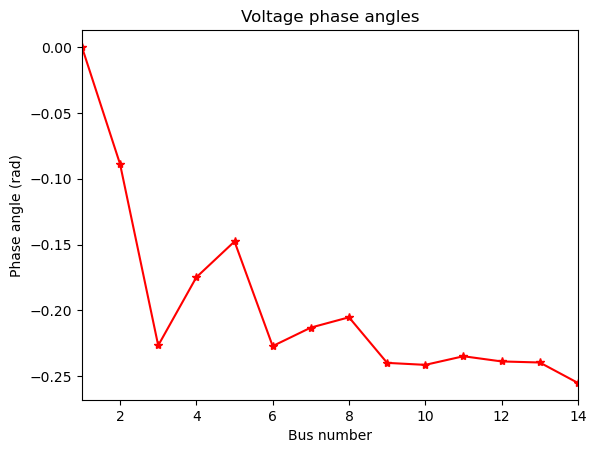

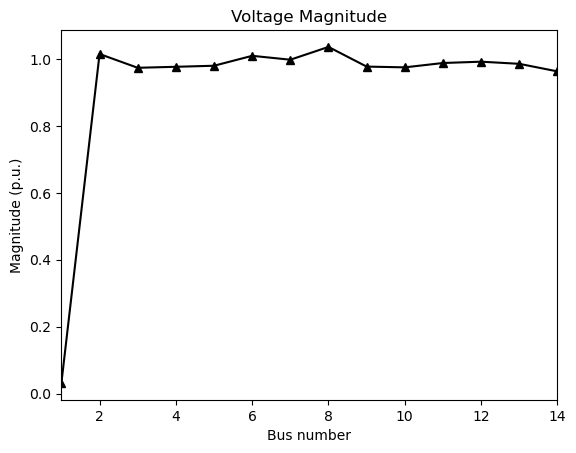

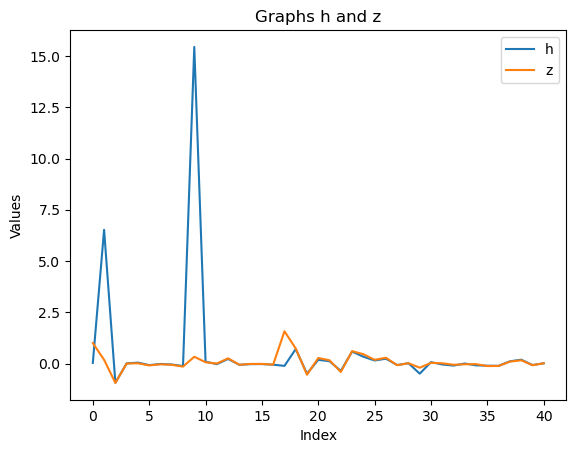

State:

 [[1.01488028]
 [0.97367141]
 [0.97664517]
 [0.97977118]
 [1.00944402]
 [0.99778781]
 [1.03602344]
 [0.97724624]
 [0.97494757]
 [0.98794737]
 [0.99190375]
 [0.98553448]
 [0.96291968]]


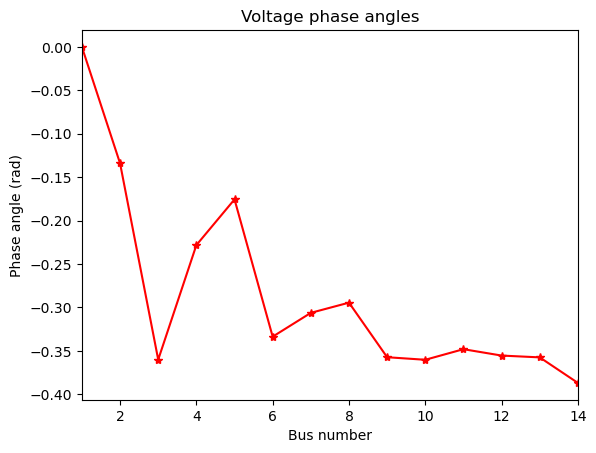

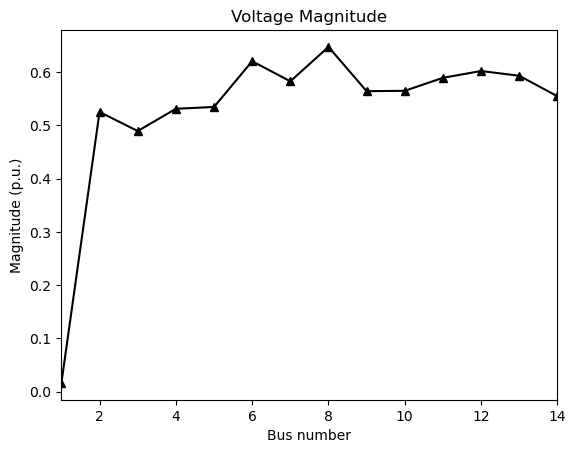

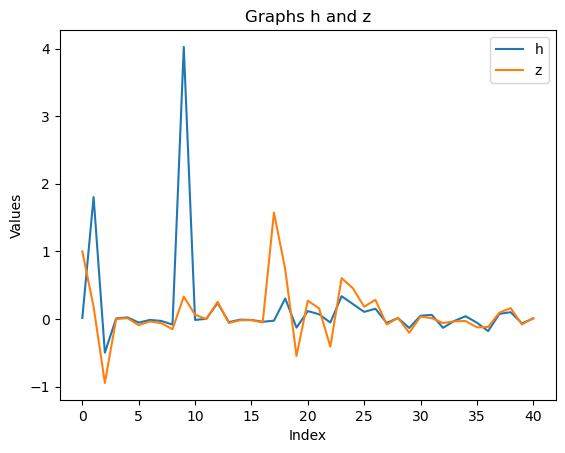

State:

 [[0.52493973]
 [0.48917033]
 [0.53090577]
 [0.53437967]
 [0.62022023]
 [0.58246114]
 [0.6470273 ]
 [0.56395192]
 [0.56464217]
 [0.58905822]
 [0.60178827]
 [0.59290085]
 [0.55444963]]


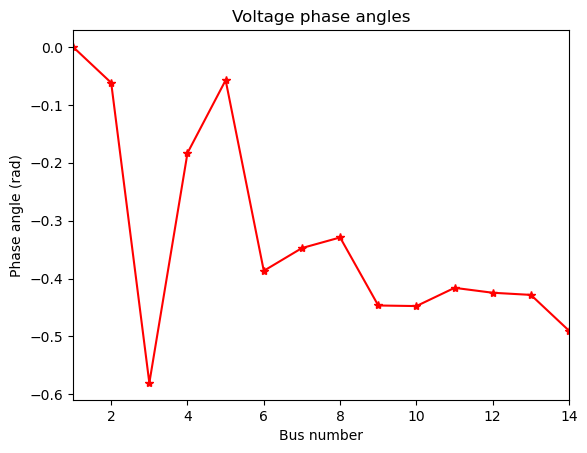

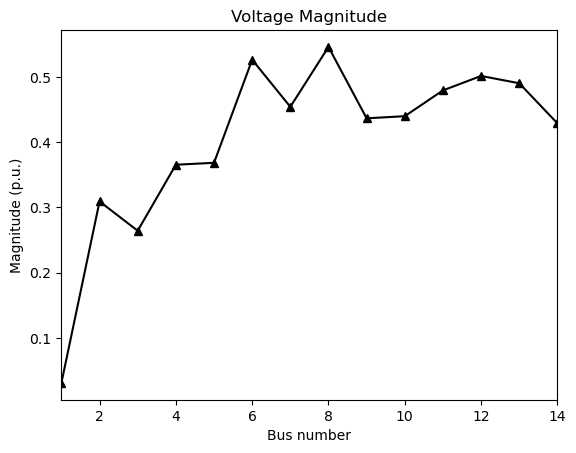

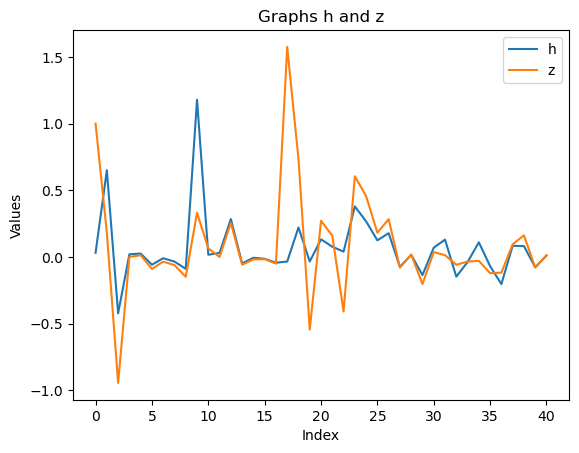

State:

 [[0.30919763]
 [0.26429341]
 [0.36541977]
 [0.3683665 ]
 [0.52622546]
 [0.4540486 ]
 [0.54578506]
 [0.43646292]
 [0.43974001]
 [0.47923863]
 [0.50133365]
 [0.49014608]
 [0.428785  ]]


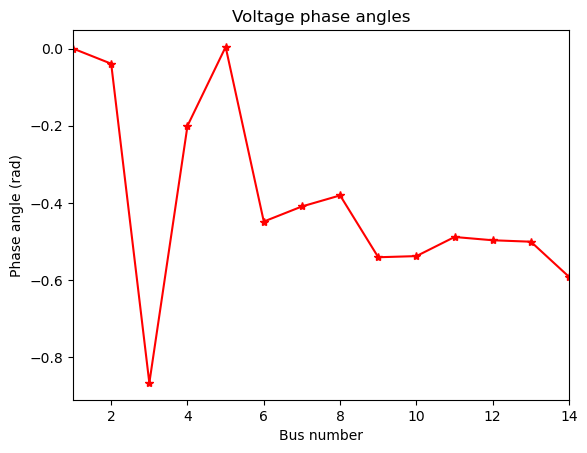

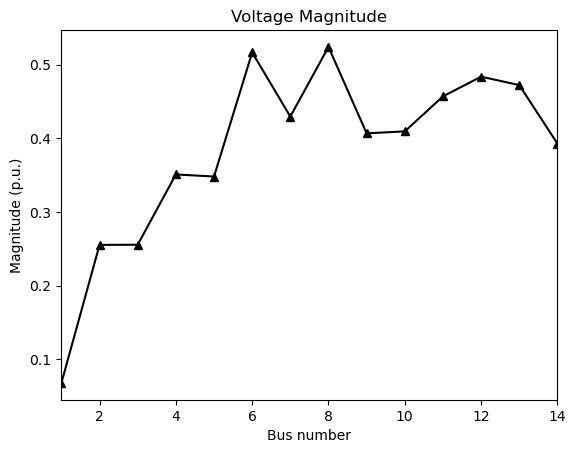

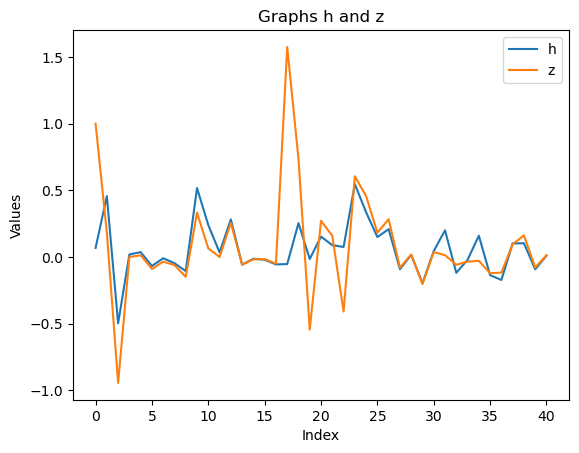

State:

 [[0.25522171]
 [0.25547471]
 [0.35089377]
 [0.34804014]
 [0.51649947]
 [0.42947398]
 [0.52400632]
 [0.40667367]
 [0.40934199]
 [0.45681767]
 [0.48362199]
 [0.47223592]
 [0.3927695 ]]


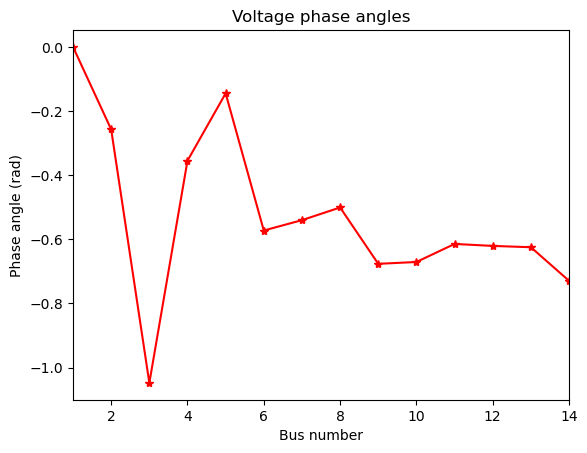

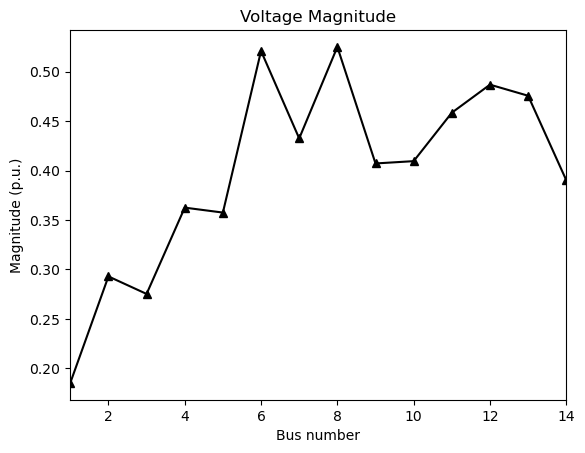

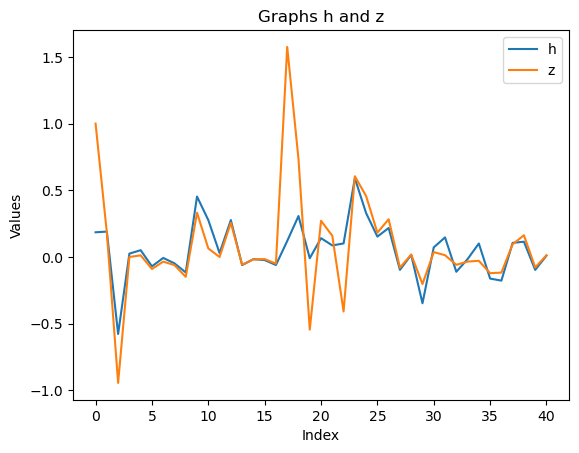

State:

 [[0.29288019]
 [0.27517087]
 [0.36244639]
 [0.35745432]
 [0.5208935 ]
 [0.43244585]
 [0.52497601]
 [0.40712299]
 [0.40945946]
 [0.45843819]
 [0.48682137]
 [0.47559949]
 [0.39015408]]


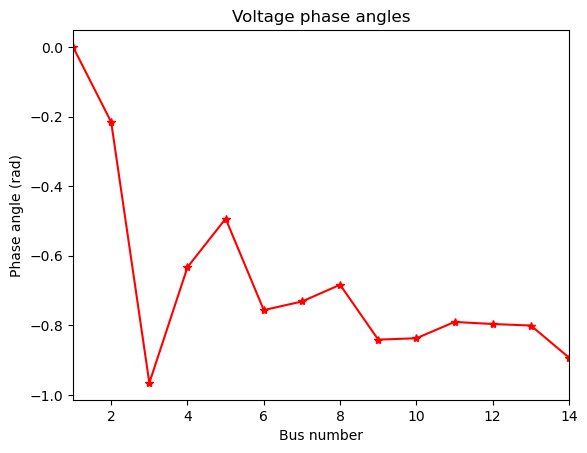

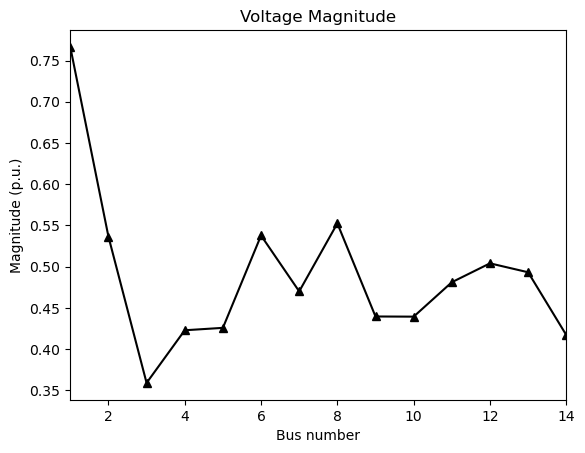

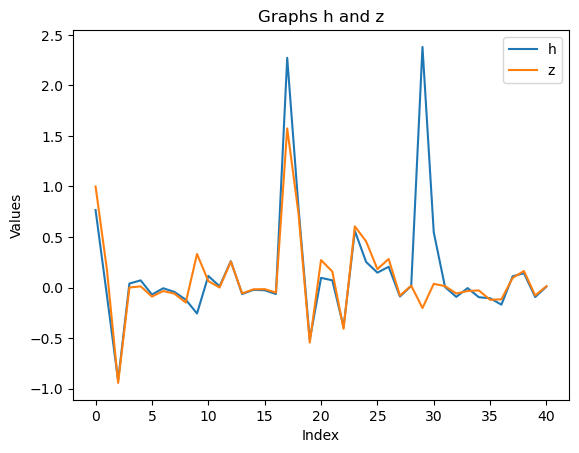

State:

 [[0.53646384]
 [0.35895728]
 [0.42282925]
 [0.42575887]
 [0.53777461]
 [0.46997432]
 [0.55248592]
 [0.43954418]
 [0.43934262]
 [0.48108823]
 [0.50400462]
 [0.4931756 ]
 [0.41704933]]


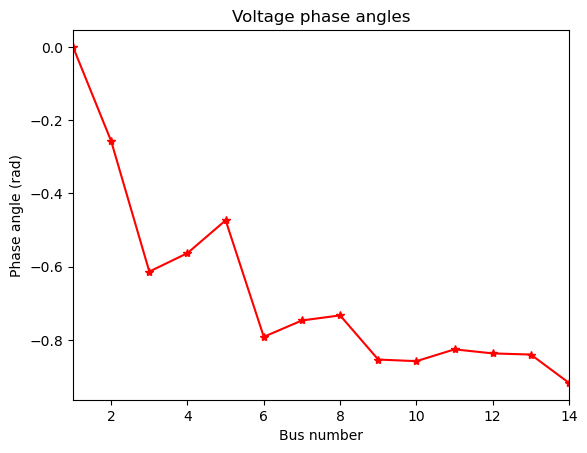

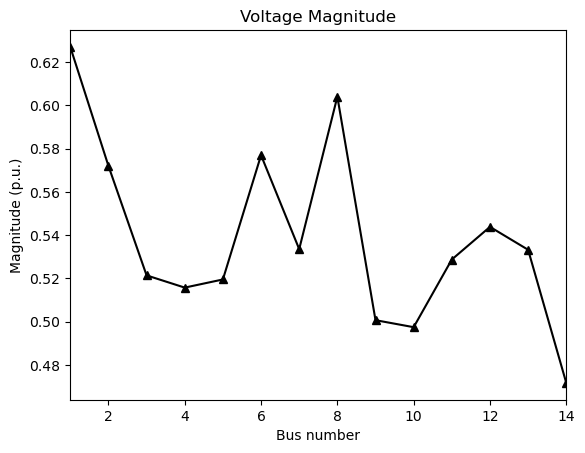

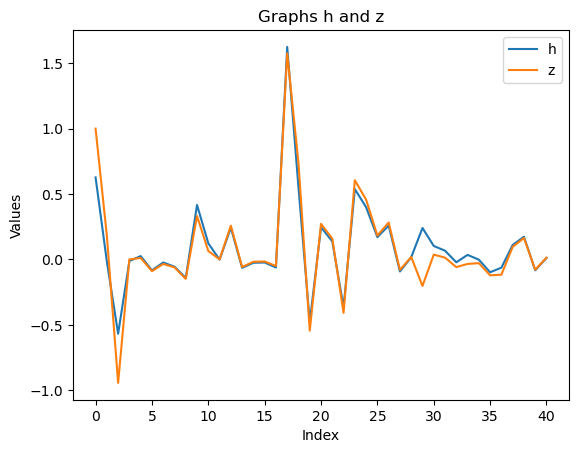

State:

 [[0.57199871]
 [0.52136477]
 [0.51571047]
 [0.51947357]
 [0.57693541]
 [0.53349852]
 [0.60400864]
 [0.50064843]
 [0.49740994]
 [0.52870157]
 [0.54379649]
 [0.53320183]
 [0.47162974]]


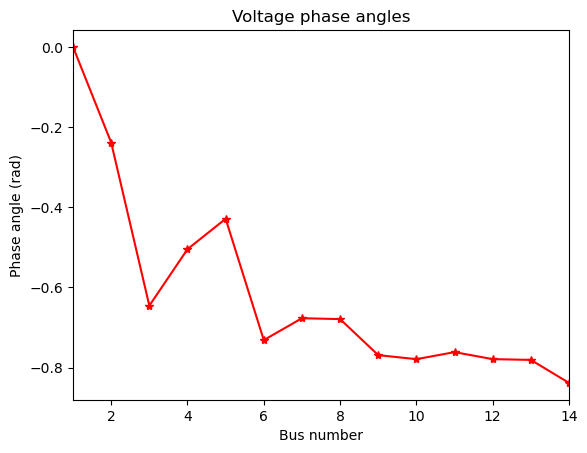

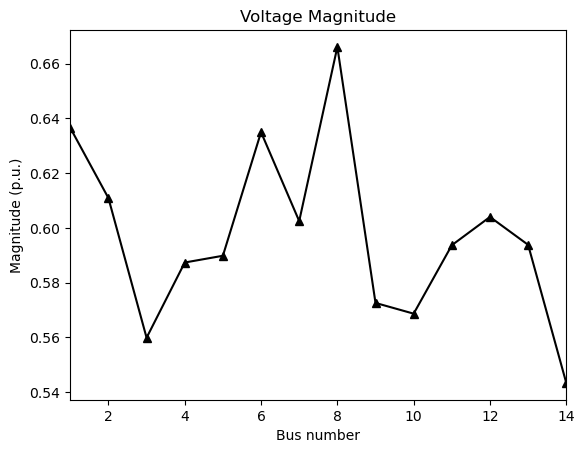

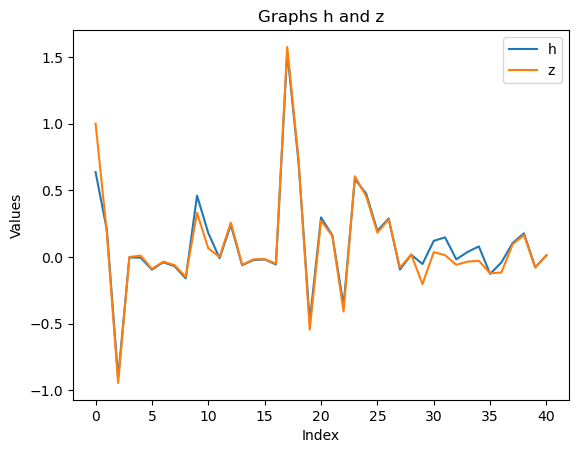

State:

 [[0.61090321]
 [0.559873  ]
 [0.58736562]
 [0.58983477]
 [0.63500093]
 [0.60249751]
 [0.66614091]
 [0.5725972 ]
 [0.56867759]
 [0.59368717]
 [0.60401761]
 [0.59382478]
 [0.54337082]]


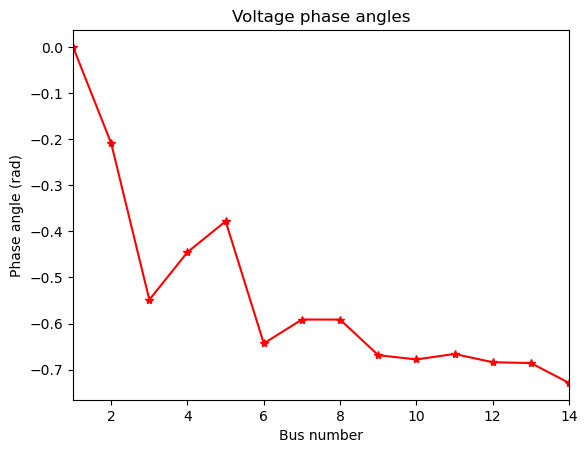

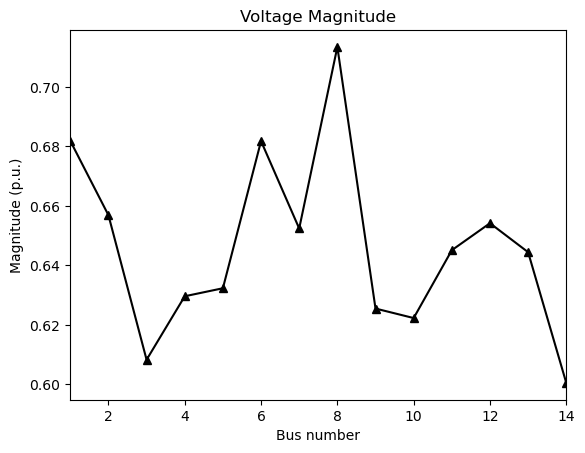

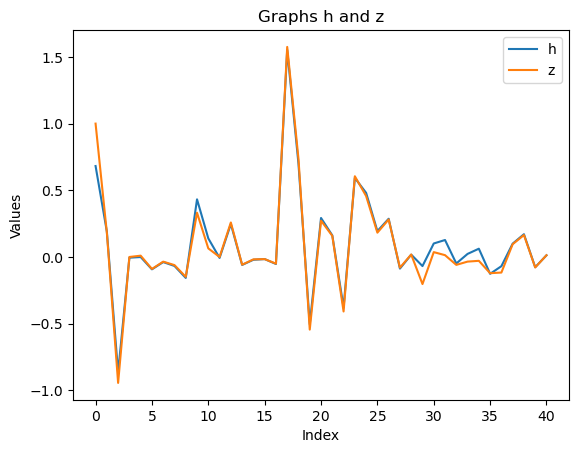

State:

 [[0.65689679]
 [0.60831046]
 [0.62964624]
 [0.6323389 ]
 [0.68179348]
 [0.6524168 ]
 [0.71343611]
 [0.62551654]
 [0.6223236 ]
 [0.64512346]
 [0.65419271]
 [0.64445501]
 [0.60052309]]


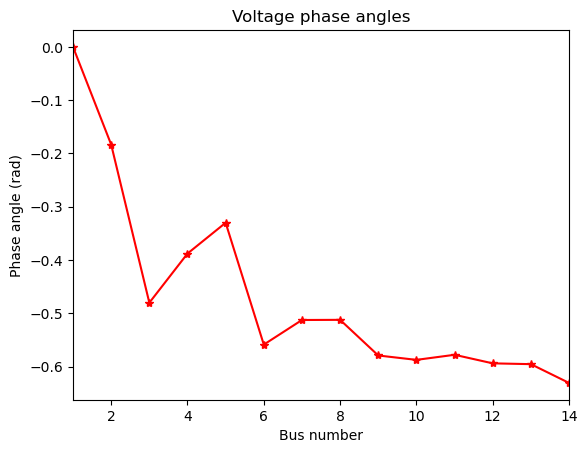

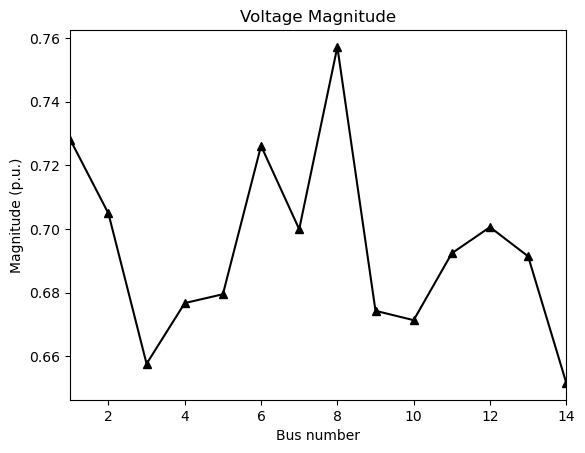

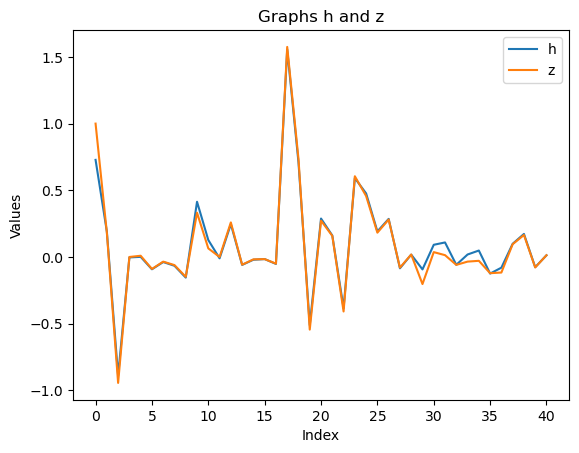

State:

 [[0.7049093 ]
 [0.65767732]
 [0.67675421]
 [0.67952892]
 [0.72615469]
 [0.69995486]
 [0.75721198]
 [0.6743235 ]
 [0.67138043]
 [0.69239672]
 [0.70061249]
 [0.69143474]
 [0.65167284]]


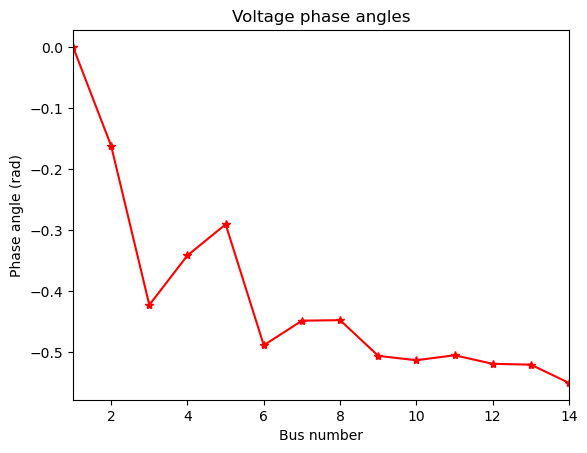

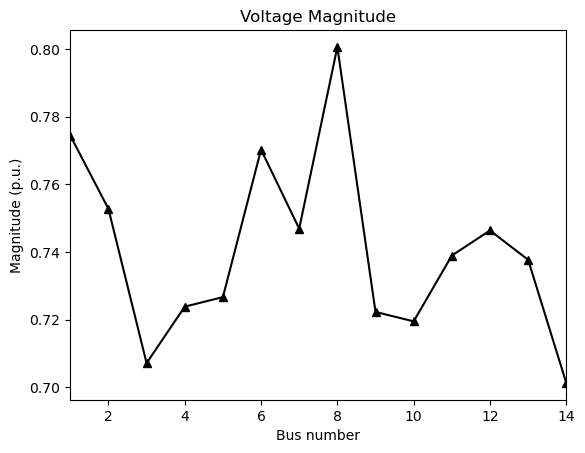

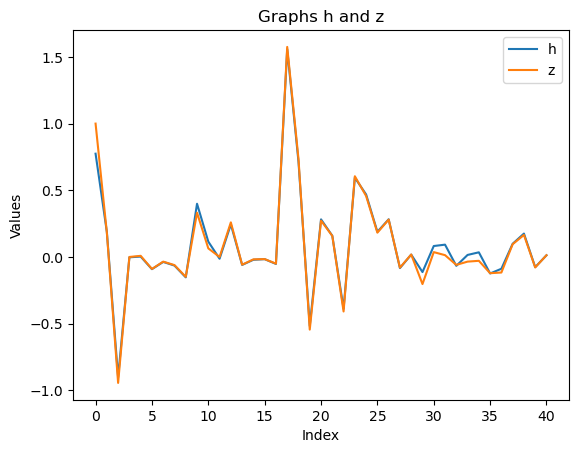

State:

 [[0.75276839]
 [0.70715064]
 [0.7238488 ]
 [0.72666785]
 [0.77028471]
 [0.74691257]
 [0.80065028]
 [0.72228656]
 [0.71949988]
 [0.73895124]
 [0.74637199]
 [0.73770813]
 [0.70129644]]


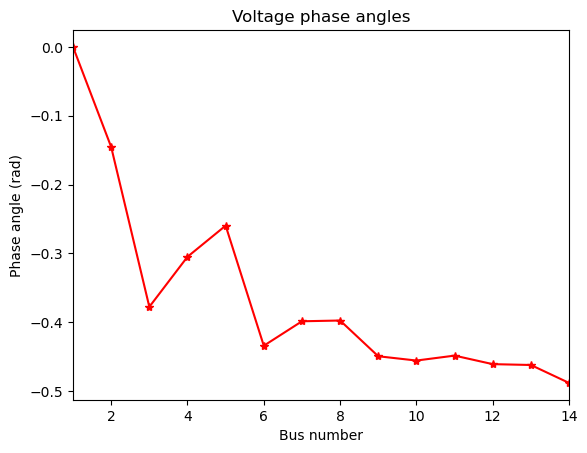

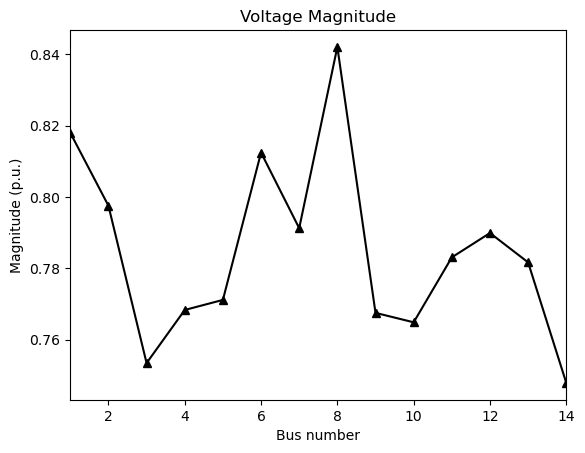

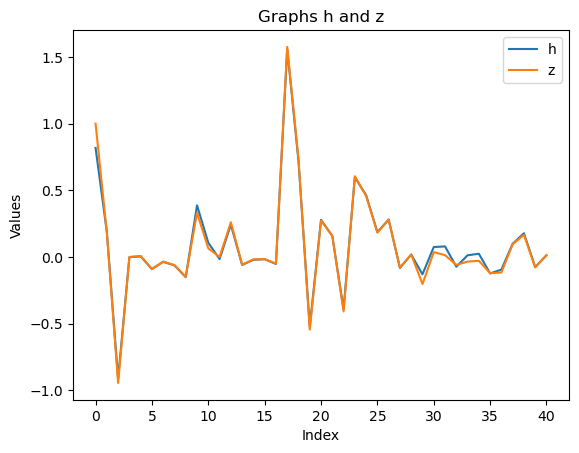

State:

 [[0.79754623]
 [0.75346786]
 [0.76834321]
 [0.77116266]
 [0.81242953]
 [0.79125917]
 [0.84202375]
 [0.76753479]
 [0.76489054]
 [0.78308102]
 [0.78989886]
 [0.78167464]
 [0.74791221]]


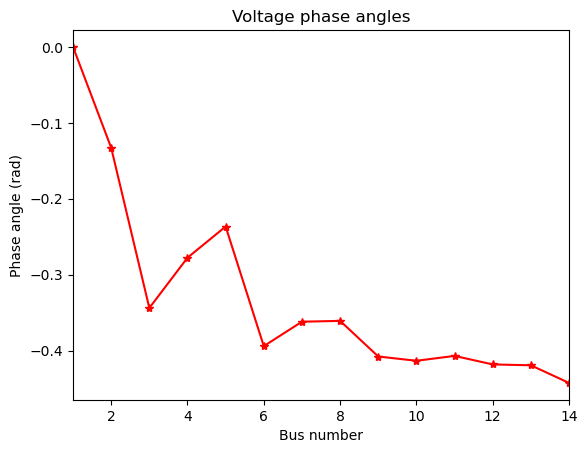

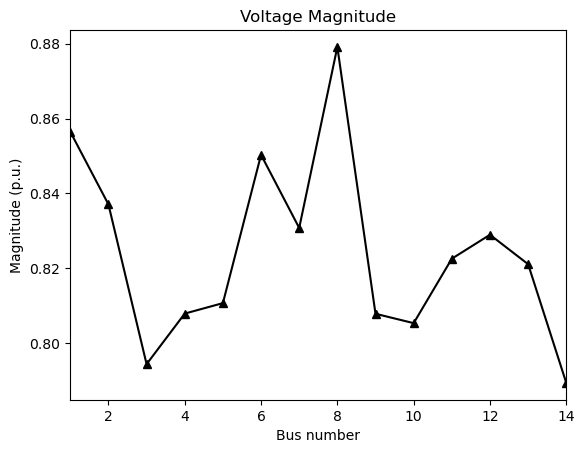

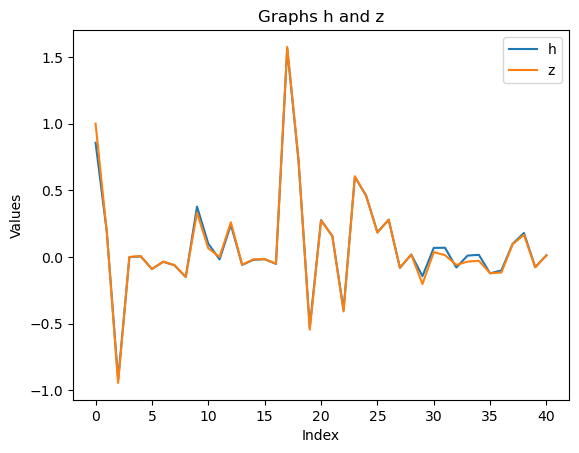

State:

 [[0.83706299]
 [0.79435128]
 [0.80786955]
 [0.81066782]
 [0.85031767]
 [0.83076472]
 [0.87915845]
 [0.80781906]
 [0.80531444]
 [0.8225426 ]
 [0.82894554]
 [0.82107158]
 [0.78933432]]


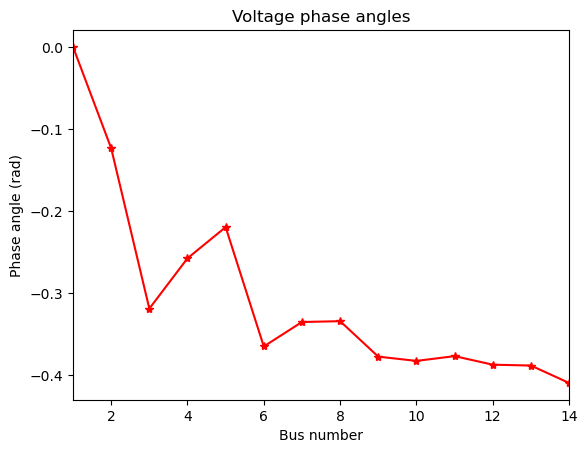

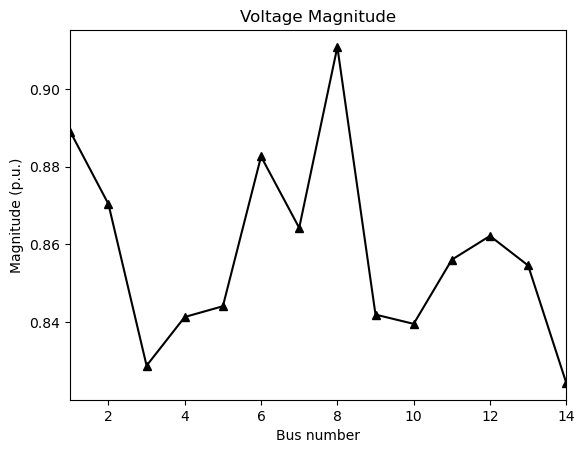

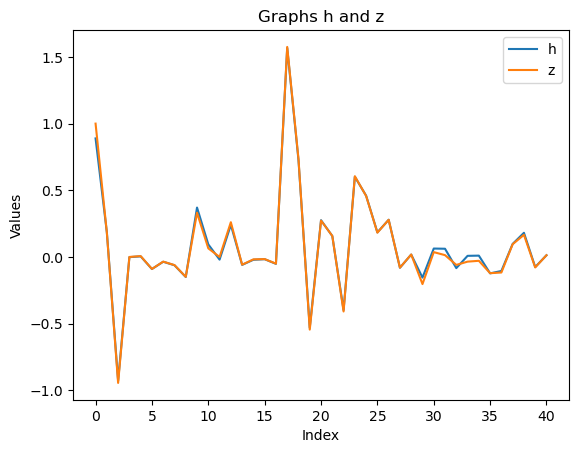

State:

 [[0.87037255]
 [0.82879436]
 [0.84132032]
 [0.84409037]
 [0.88261929]
 [0.86425142]
 [0.91080769]
 [0.84193567]
 [0.8395527 ]
 [0.85605773]
 [0.86217628]
 [0.85457227]
 [0.82435645]]


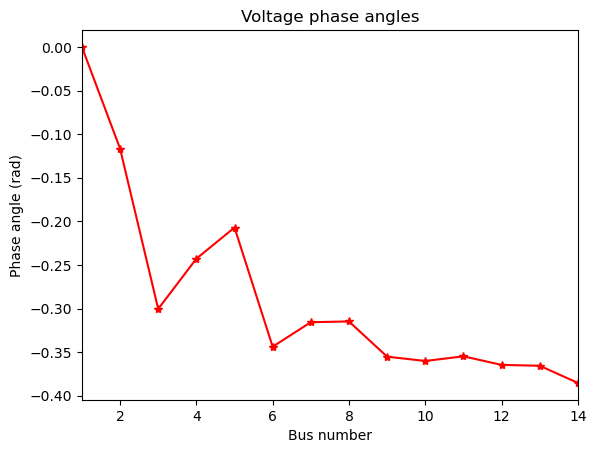

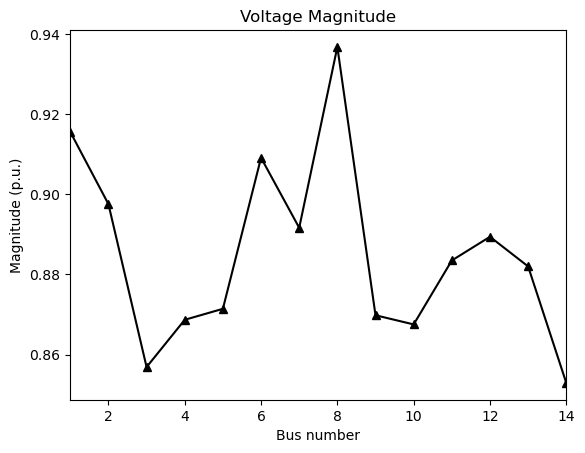

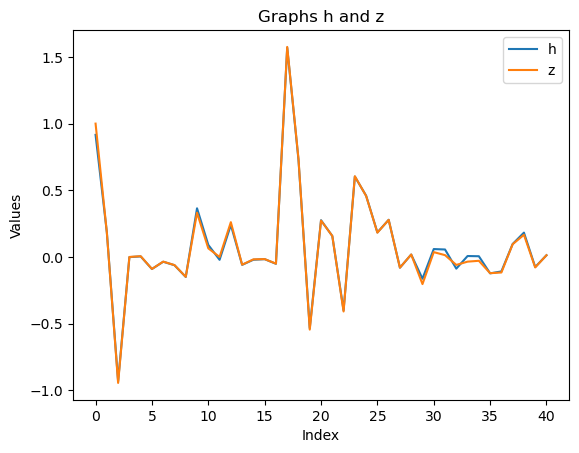

State:

 [[0.89754261]
 [0.85686572]
 [0.86866499]
 [0.8714072 ]
 [0.90911139]
 [0.89162957]
 [0.93677799]
 [0.86979748]
 [0.86751015]
 [0.88347089]
 [0.8893853 ]
 [0.88198664]
 [0.85290713]]


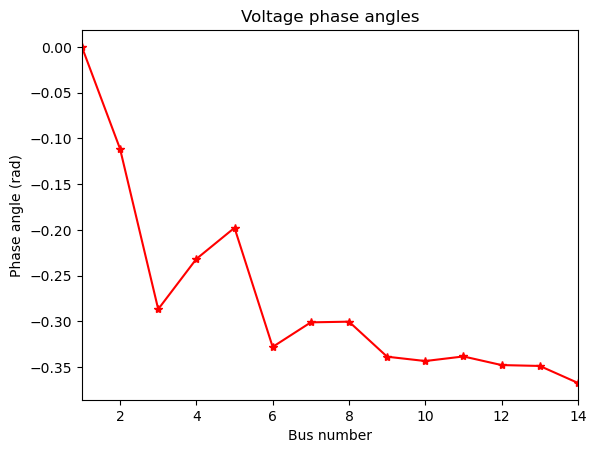

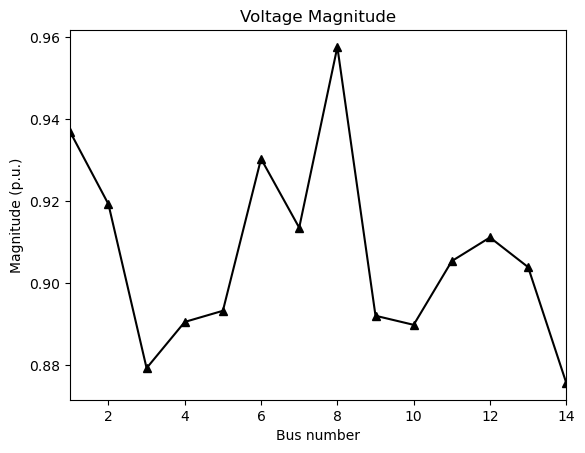

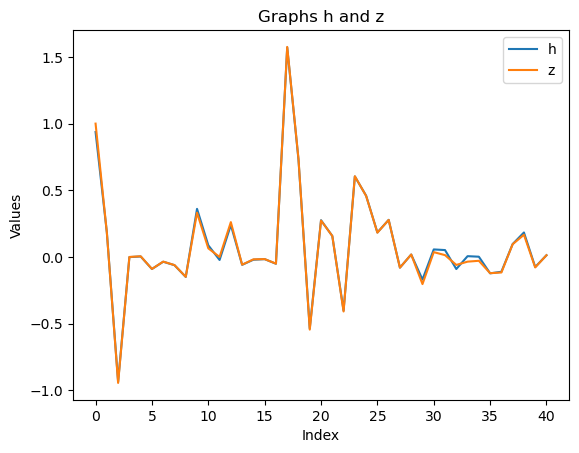

State:

 [[0.91920716]
 [0.87922956]
 [0.89049249]
 [0.8932102 ]
 [0.93027924]
 [0.9134721 ]
 [0.95754945]
 [0.89200167]
 [0.88978469]
 [0.90533305]
 [0.91109451]
 [0.90385176]
 [0.87562271]]


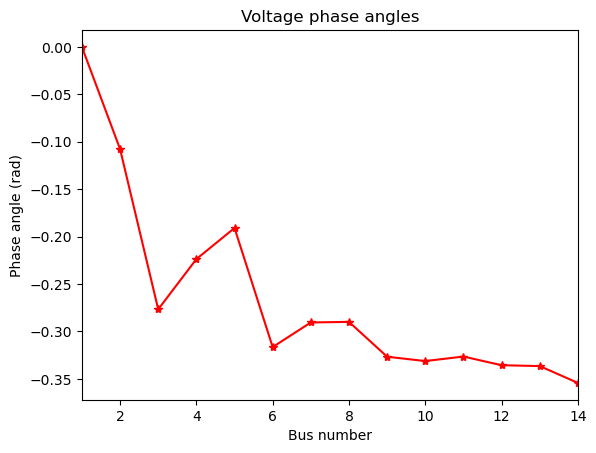

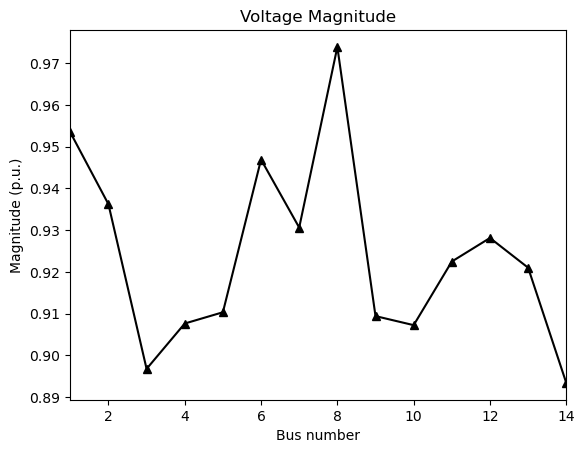

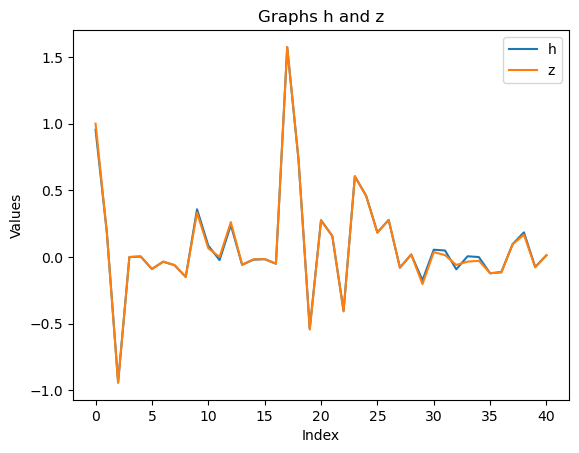

State:

 [[0.93622454]
 [0.89678293]
 [0.90764767]
 [0.91034486]
 [0.94691604]
 [0.93062642]
 [0.97389068]
 [0.90942286]
 [0.90725666]
 [0.92249198]
 [0.92813633]
 [0.92101196]
 [0.8934202 ]]


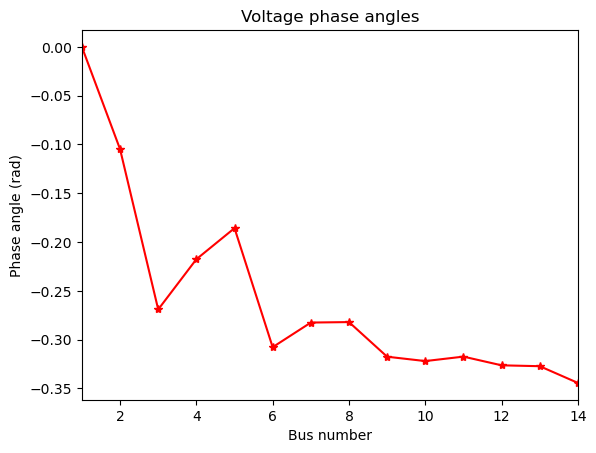

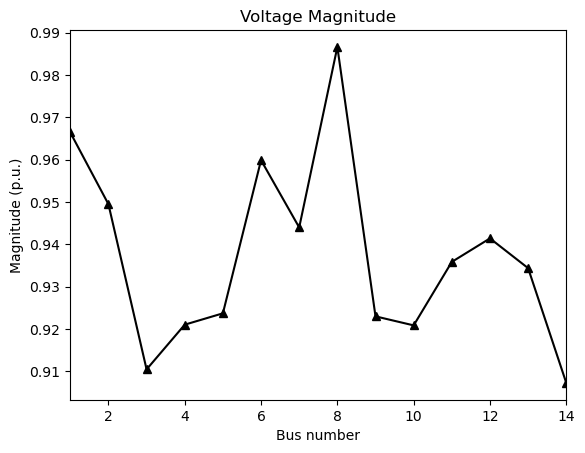

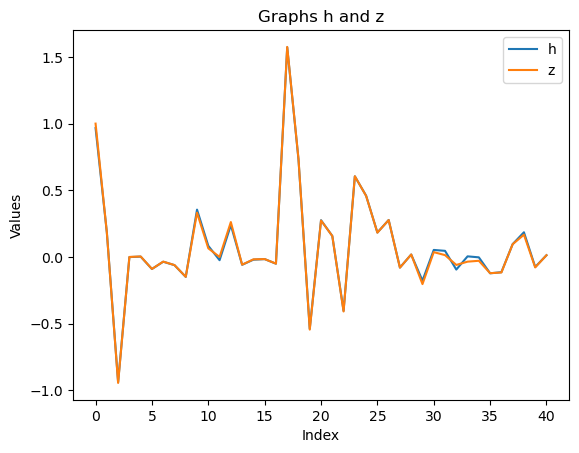

State:

 [[0.94946561]
 [0.91043301]
 [0.92100023]
 [0.92368092]
 [0.95986272]
 [0.94397063]
 [0.98662248]
 [0.92296245]
 [0.92083309]
 [0.93583123]
 [0.94138566]
 [0.9343512 ]
 [0.9072376 ]]


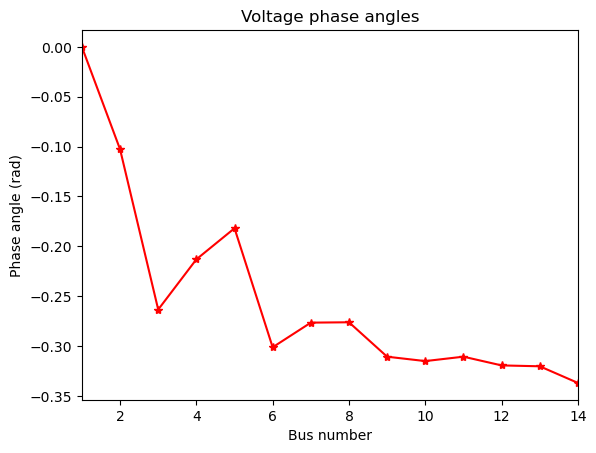

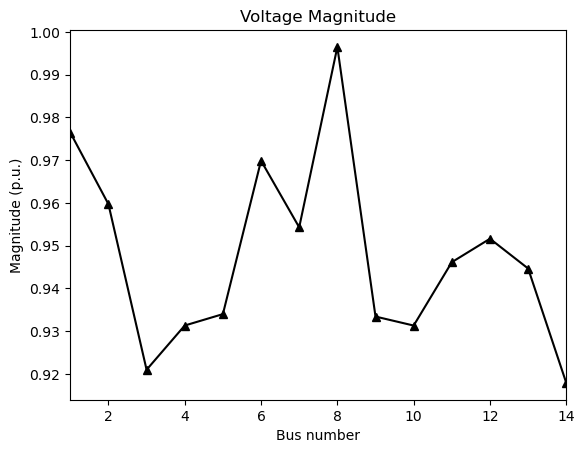

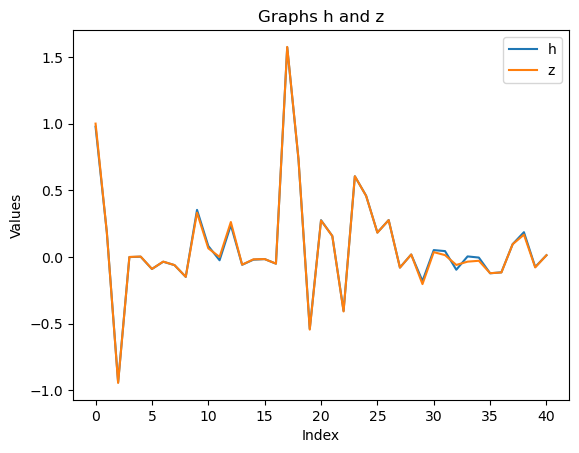

State:

 [[0.95970944]
 [0.92098892]
 [0.93133296]
 [0.93400002]
 [0.96987735]
 [0.9542921 ]
 [0.99648069]
 [0.93342764]
 [0.93132479]
 [0.9461422 ]
 [0.95162715]
 [0.9446609 ]
 [0.91790911]]


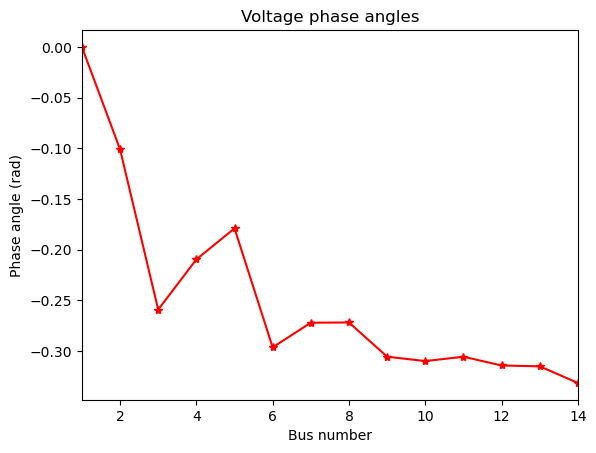

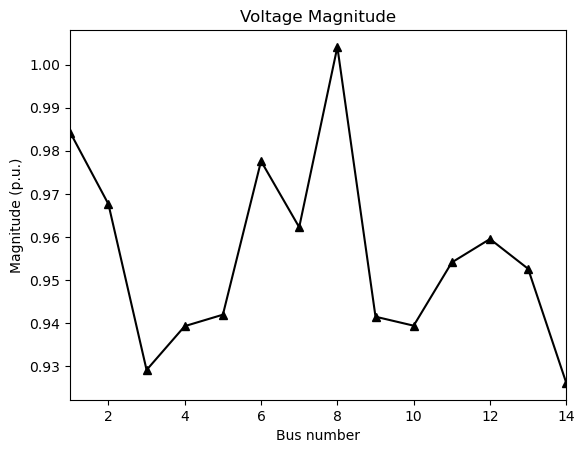

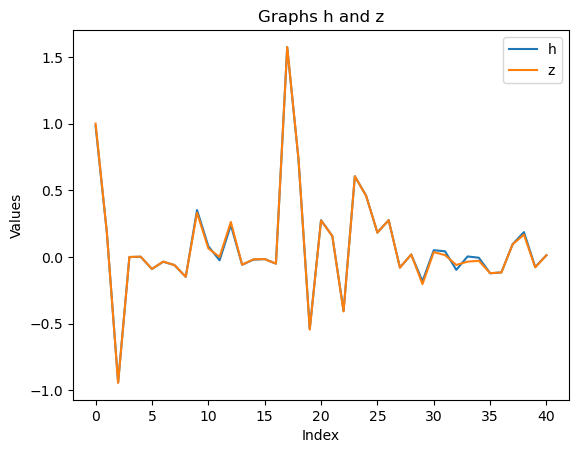

State:

 [[0.96760841]
 [0.92912569]
 [0.93930115]
 [0.94195764]
 [0.97759789]
 [0.96224952]
 [1.00408957]
 [0.94149057]
 [0.93940711]
 [0.95408691]
 [0.95951827]
 [0.95260389]
 [0.92612491]]


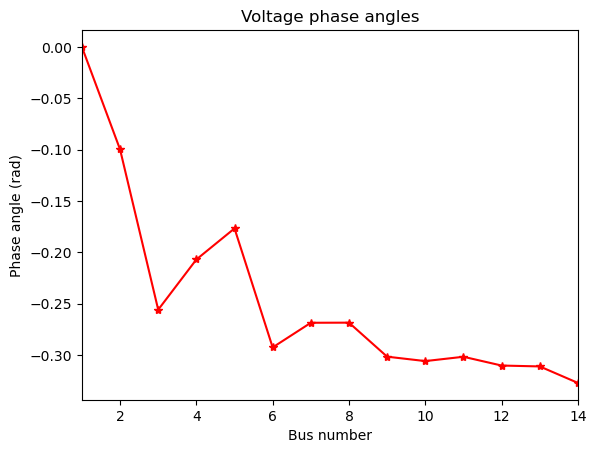

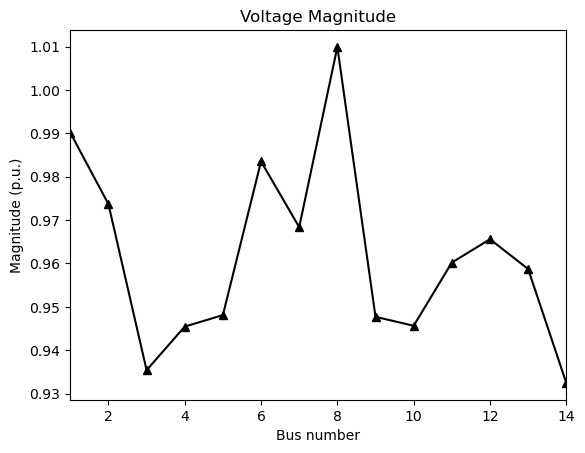

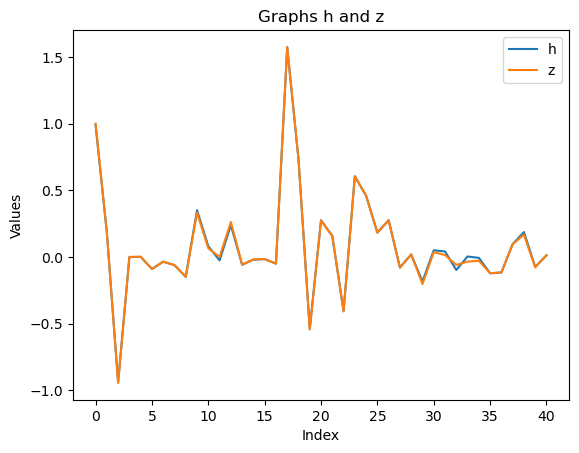

State:

 [[0.97368584]
 [0.93538542]
 [0.94543317]
 [0.94808138]
 [0.98353959]
 [0.968372  ]
 [1.00994758]
 [0.9476912 ]
 [0.94562256]
 [0.96019827]
 [0.9655886 ]
 [0.95871378]
 [0.93244066]]


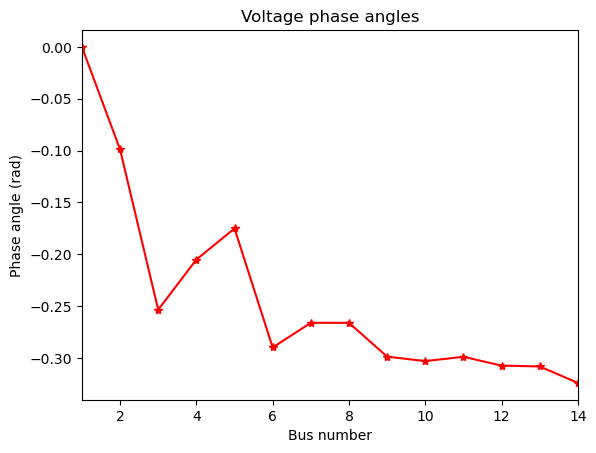

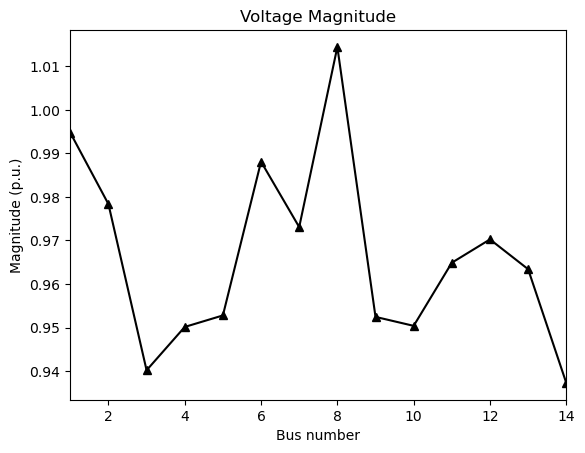

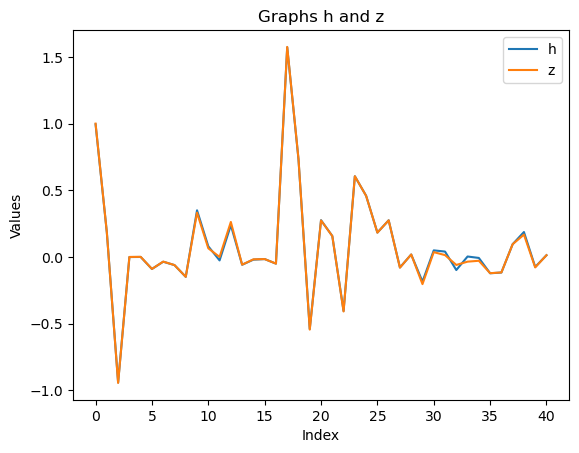

State:

 [[0.97835725]
 [0.94019655]
 [0.95014755]
 [0.95278911]
 [0.98810501]
 [0.97307881]
 [1.01445439]
 [0.95245642]
 [0.95039831]
 [0.96489347]
 [0.97025151]
 [0.96340671]
 [0.93729137]]


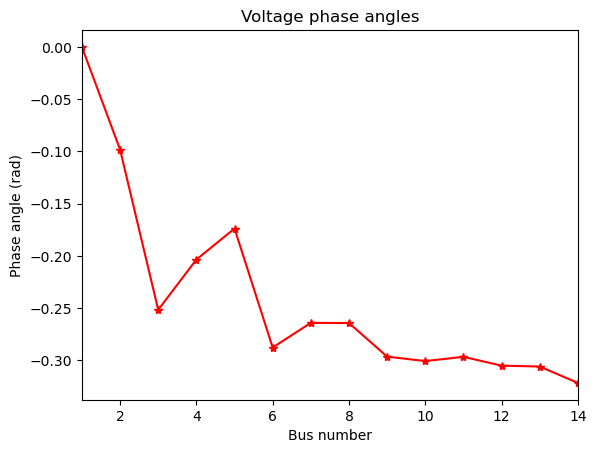

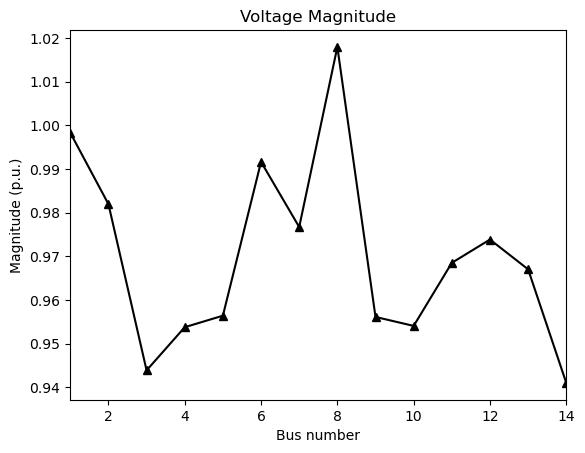

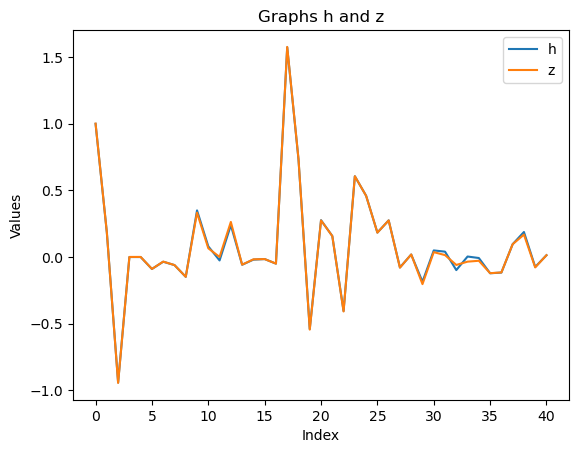

State:

 [[0.9819448 ]
 [0.94389174]
 [0.95376847]
 [0.95640468]
 [0.99161385]
 [0.97669443]
 [1.01791881]
 [0.95611574]
 [0.95406603]
 [0.96850065]
 [0.97383432]
 [0.96701241]
 [0.94101603]]


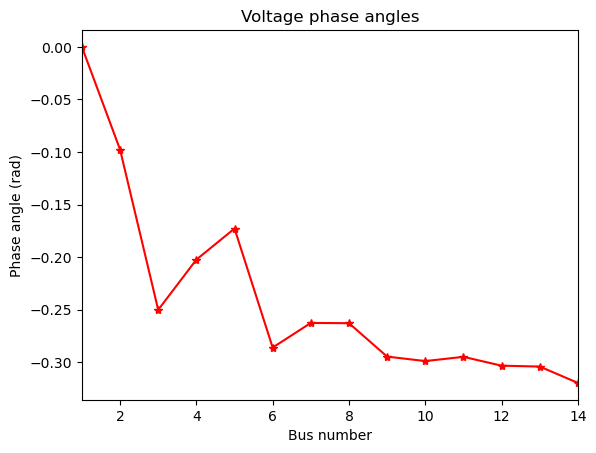

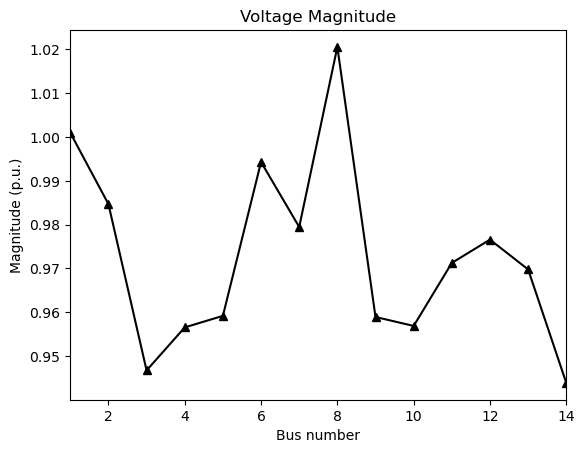

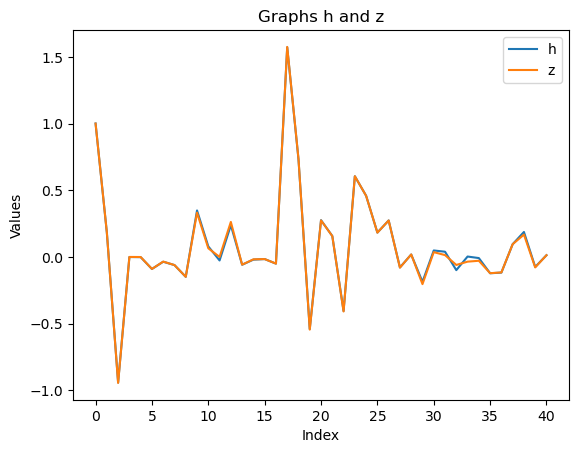

State:

 [[0.98470024]
 [0.94673024]
 [0.9565505 ]
 [0.95918253]
 [0.99430808]
 [0.97947149]
 [1.02057843]
 [0.95892625]
 [0.95688268]
 [0.97127047]
 [0.97658485]
 [0.9697804 ]
 [0.94387541]]


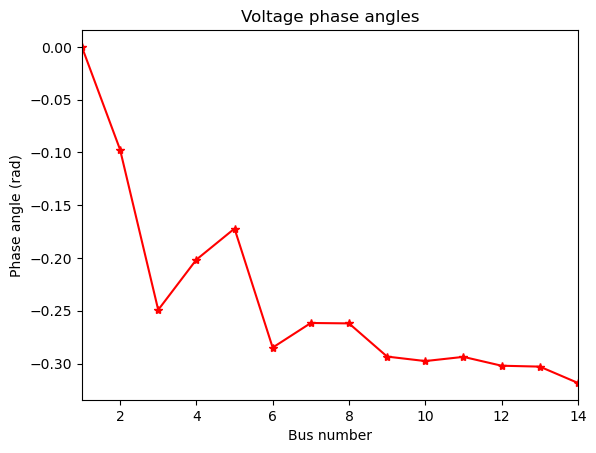

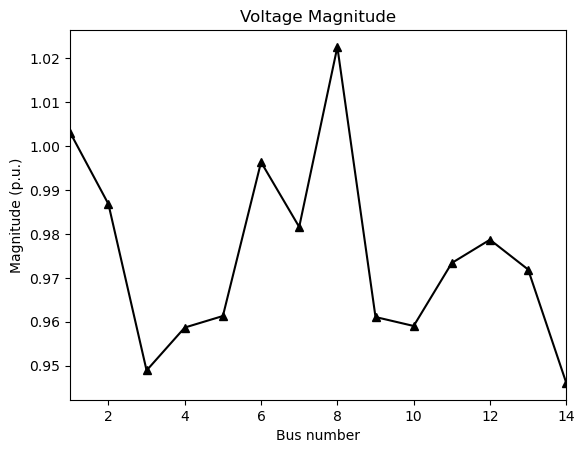

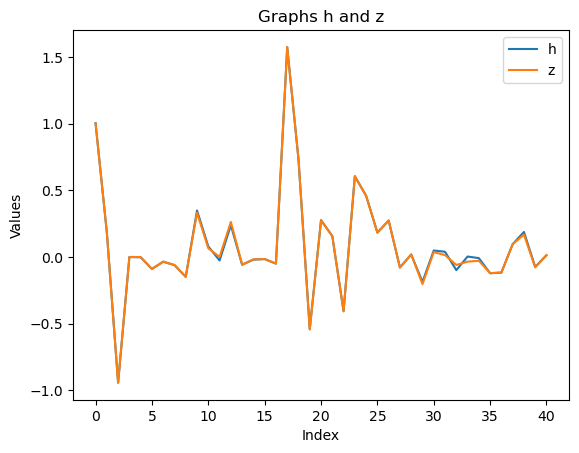

State:

 [[0.9868154 ]
 [0.94891   ]
 [0.95868689]
 [0.96131498]
 [0.99637794]
 [0.98160345]
 [1.0226185 ]
 [0.96108423]
 [0.95904551]
 [0.97339786]
 [0.9786974 ]
 [0.97190638]
 [0.94607166]]


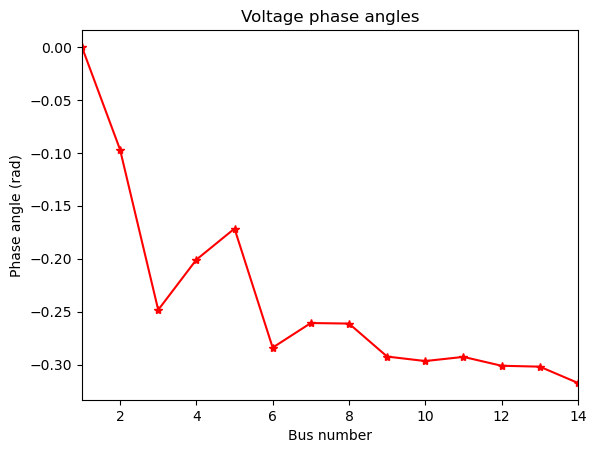

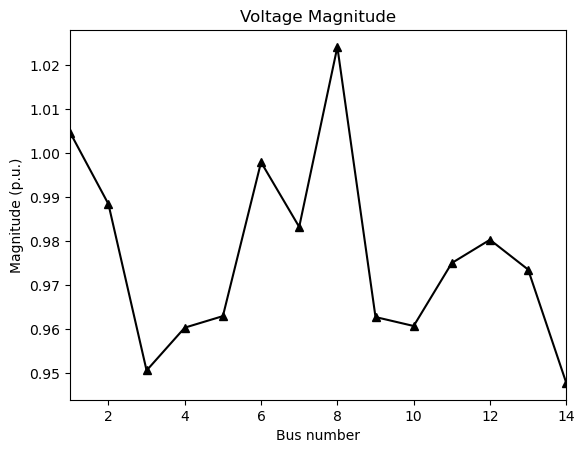

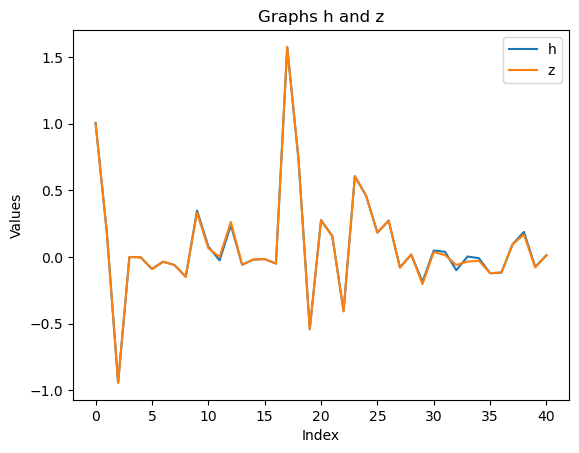

State:

 [[0.98843729]
 [0.95058266]
 [0.96032653]
 [0.96295171]
 [0.99796686]
 [0.98323932]
 [1.02418224]
 [0.96274077]
 [0.96070581]
 [0.97503094]
 [0.98031908]
 [0.97353813]
 [0.94775645]]


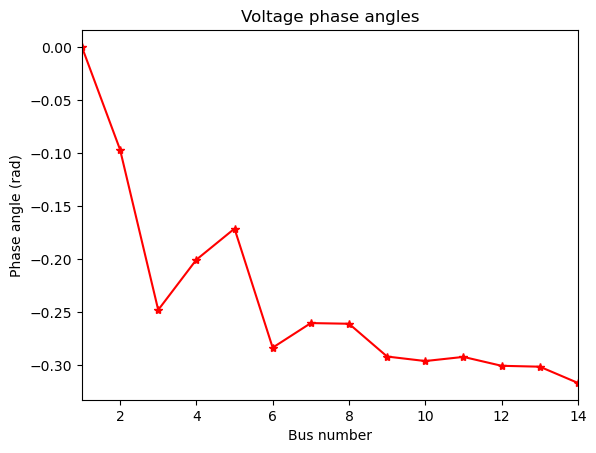

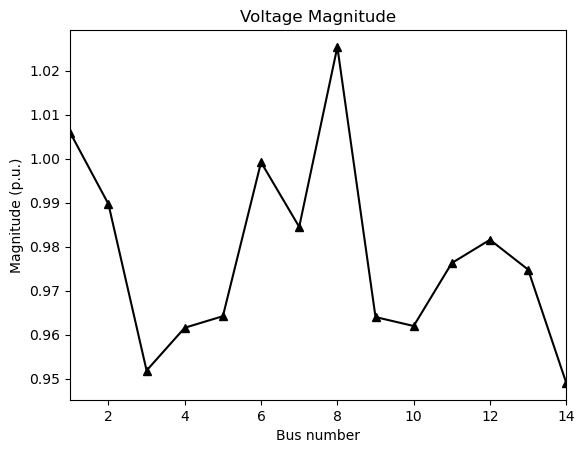

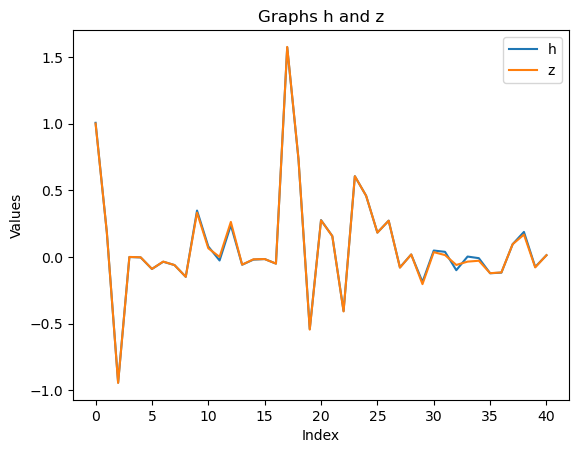

State:

 [[0.98968434]
 [0.95186907]
 [0.96158693]
 [0.96420969]
 [0.99919003]
 [0.98449571]
 [1.0253789 ]
 [0.96401505]
 [0.96198312]
 [0.97628774]
 [0.98156702]
 [0.97479376]
 [0.94905226]]


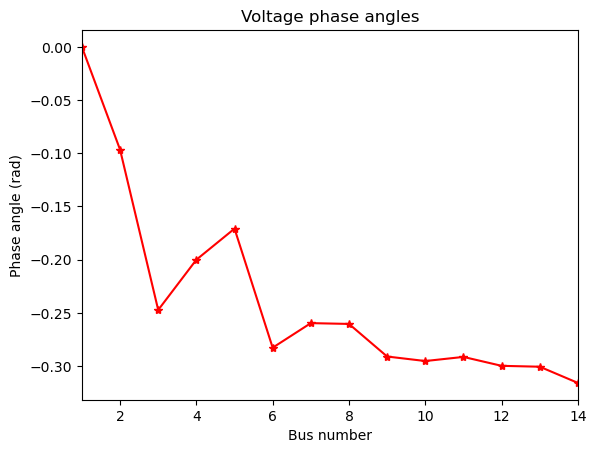

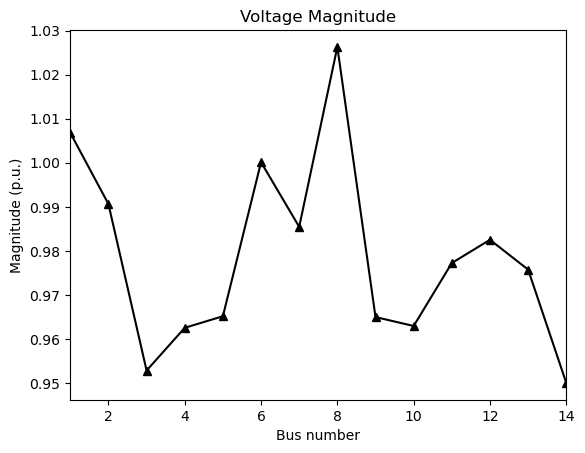

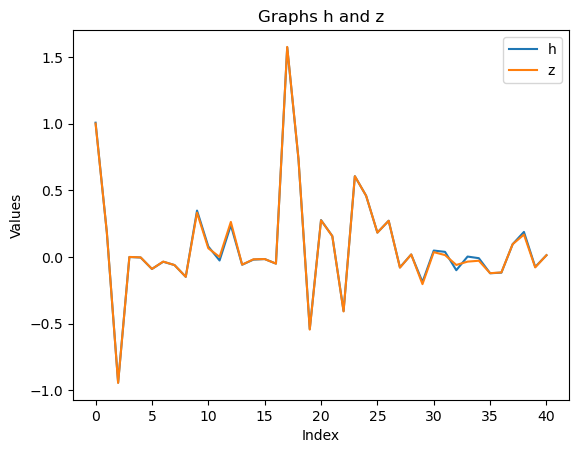

State:

 [[0.99064213]
 [0.95285816]
 [0.96255621]
 [0.96517691]
 [1.00013107]
 [0.98546005]
 [1.02629103]
 [0.96499552]
 [0.96296595]
 [0.97725483]
 [0.98252702]
 [0.97575968]
 [0.95004898]]


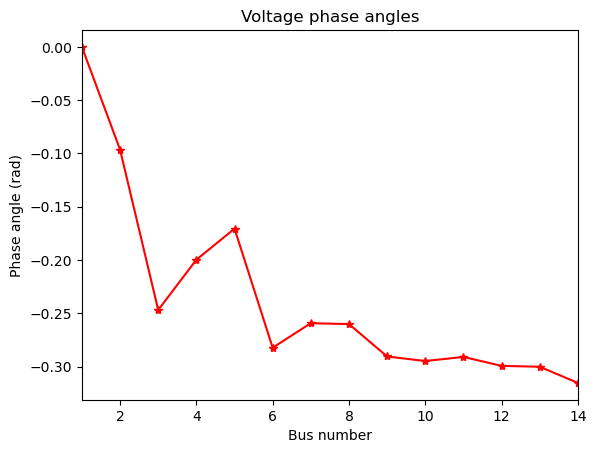

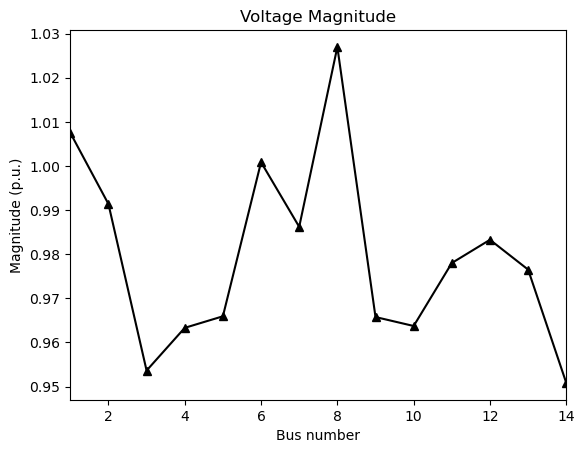

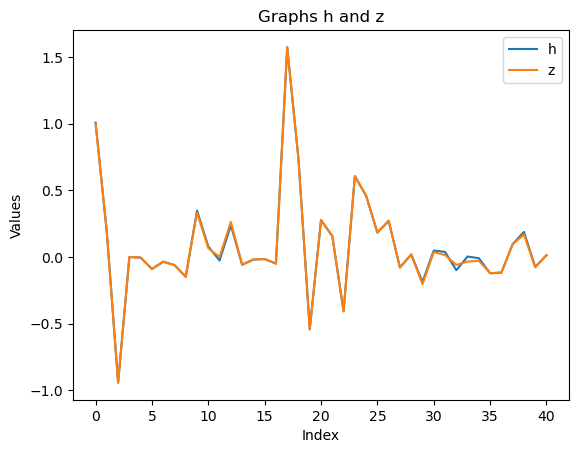

State:

 [[0.99137838]
 [0.95361923]
 [0.96330149]
 [0.96592042]
 [1.00085533]
 [0.98620001]
 [1.02698556]
 [0.96575028]
 [0.96372243]
 [0.9779991 ]
 [0.98326576]
 [0.97650292]
 [0.95081591]]


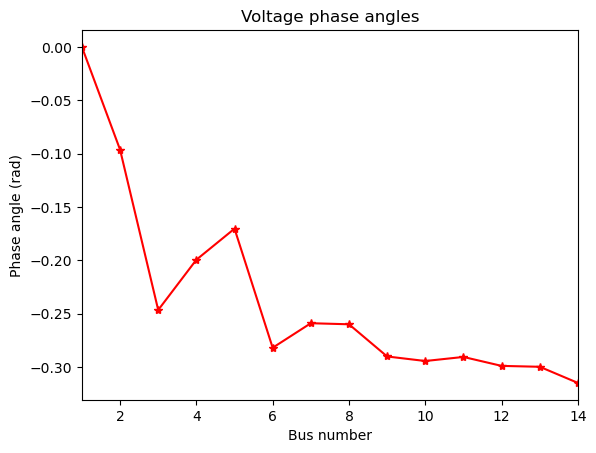

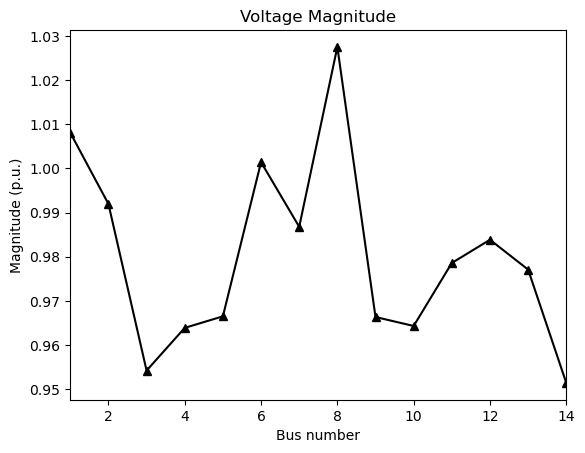

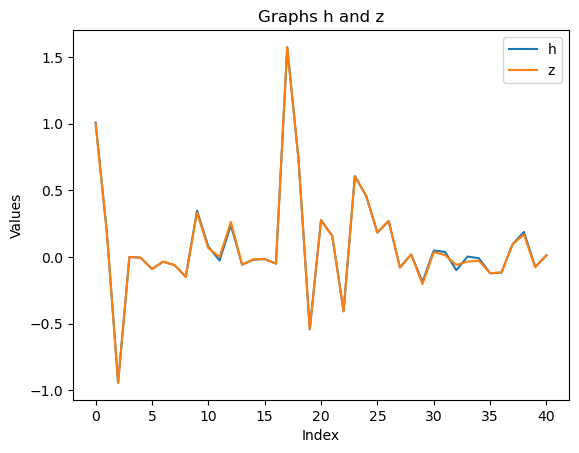

State:

 [[0.99194347]
 [0.95420442]
 [0.96387473]
 [0.96649165]
 [1.00141432]
 [0.9867676 ]
 [1.02751215]
 [0.96633208]
 [0.96430584]
 [0.97857351]
 [0.98383585]
 [0.97707636]
 [0.95140711]]


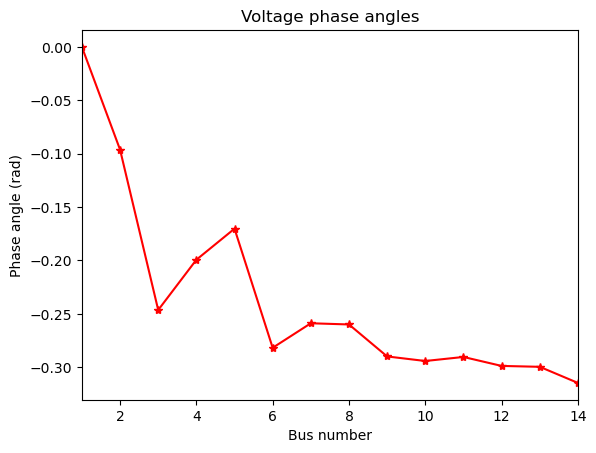

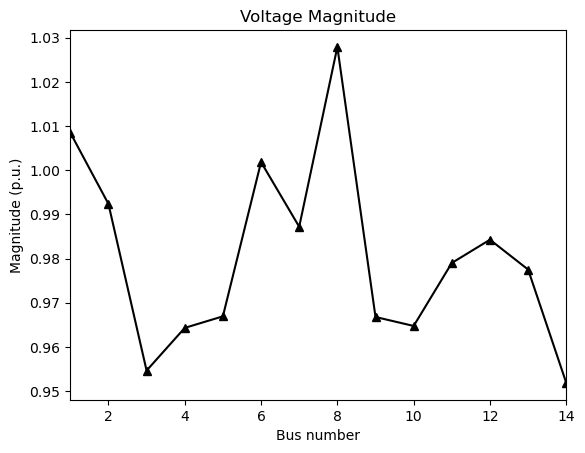

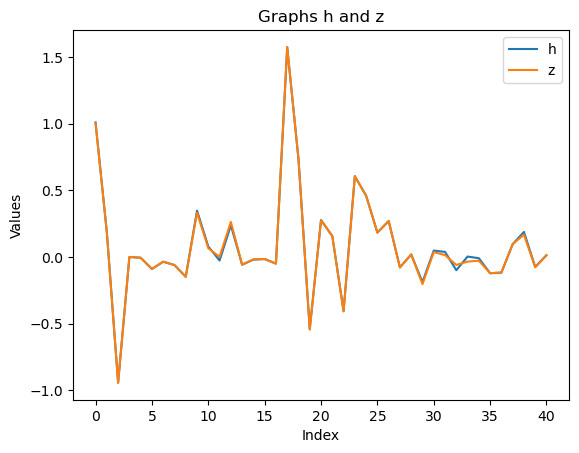

State:

 [[0.99237655]
 [0.95465419]
 [0.96431516]
 [0.9669307 ]
 [1.00184355]
 [0.98720074]
 [1.02790446]
 [0.9667799 ]
 [0.96475466]
 [0.97901494]
 [0.9842734 ]
 [0.97751645]
 [0.95186131]]


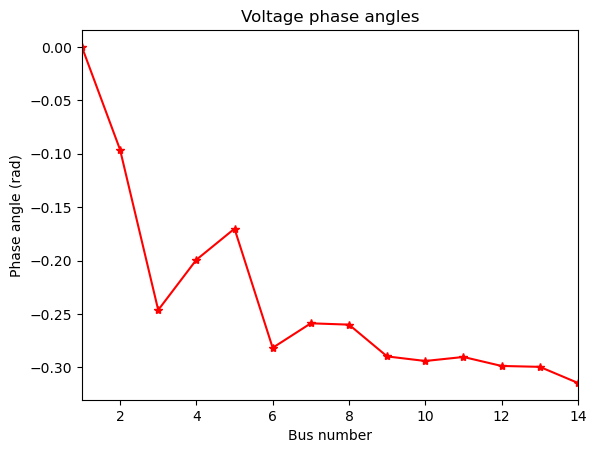

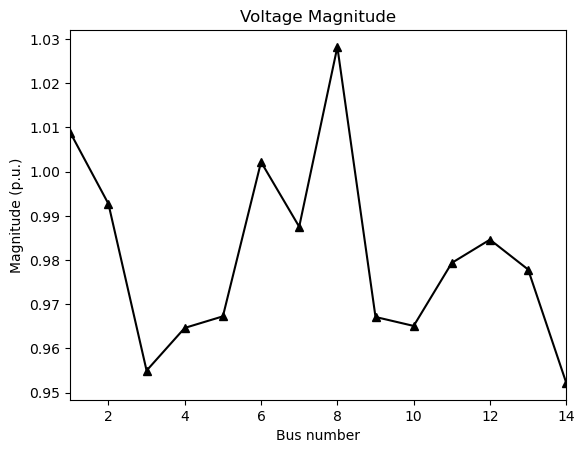

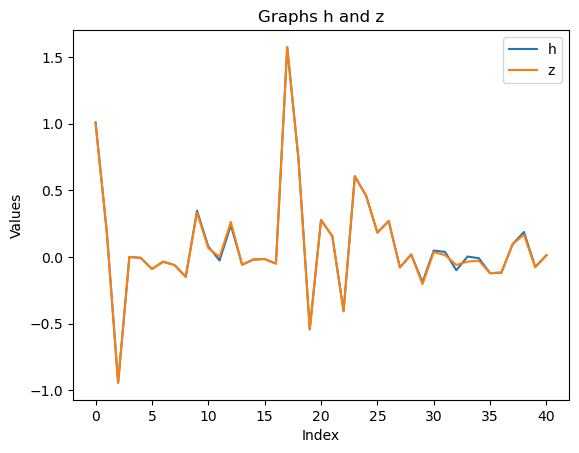

State:

 [[0.99271078]
 [0.95500156]
 [0.96465485]
 [0.9672691 ]
 [1.00217835]
 [0.98753209]
 [1.02819425]
 [0.96712736]
 [0.96510325]
 [0.97935862]
 [0.98461453]
 [0.97785954]
 [0.95221506]]


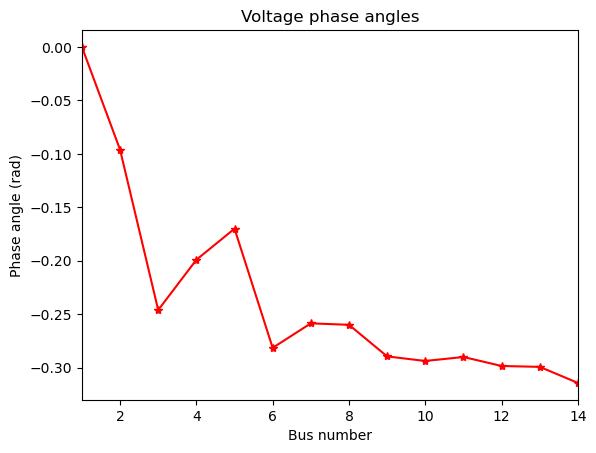

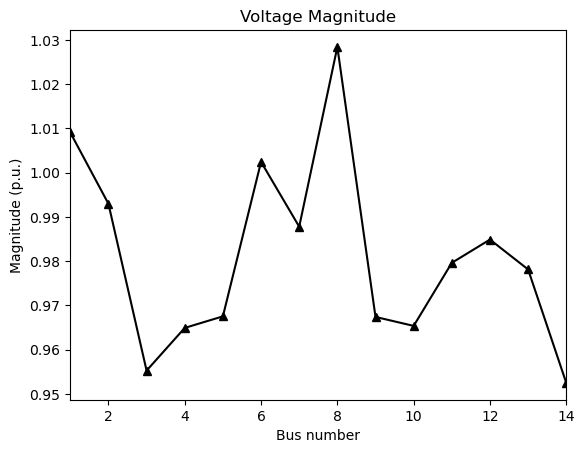

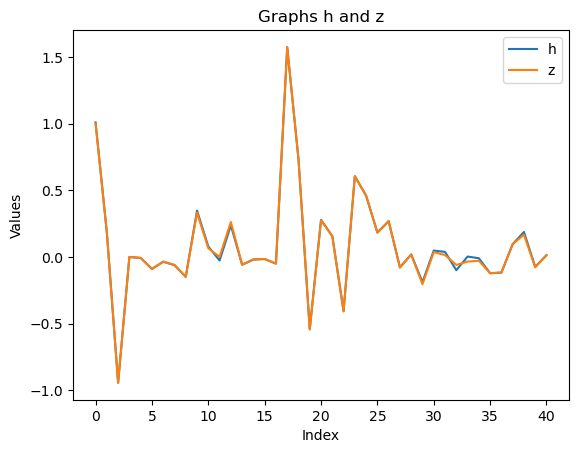

State:

 [[0.99296829]
 [0.95527049]
 [0.96491769]
 [0.96753078]
 [1.00243739]
 [0.98778559]
 [1.02840611]
 [0.96739774]
 [0.96537416]
 [0.9796251 ]
 [0.98487834]
 [0.97812491]
 [0.9524889 ]]


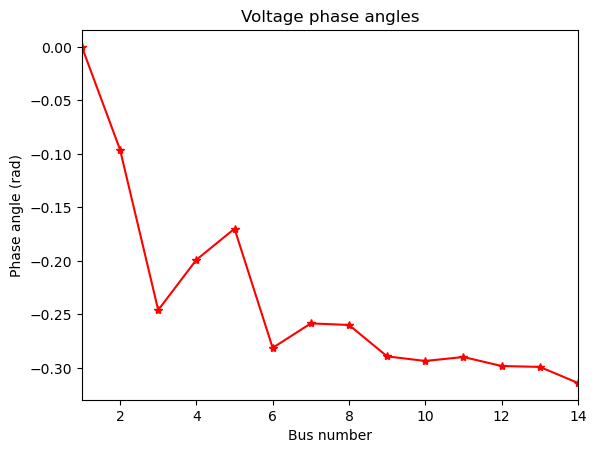

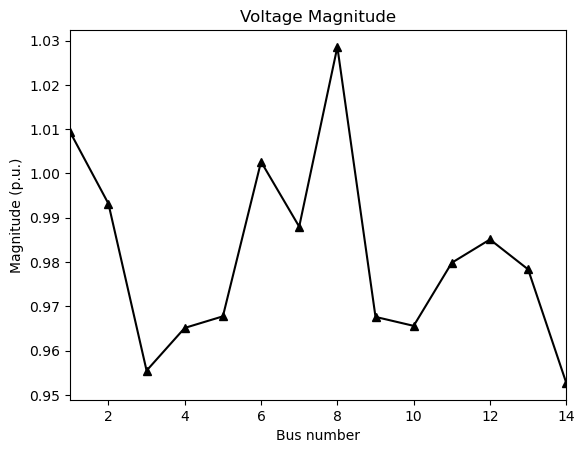

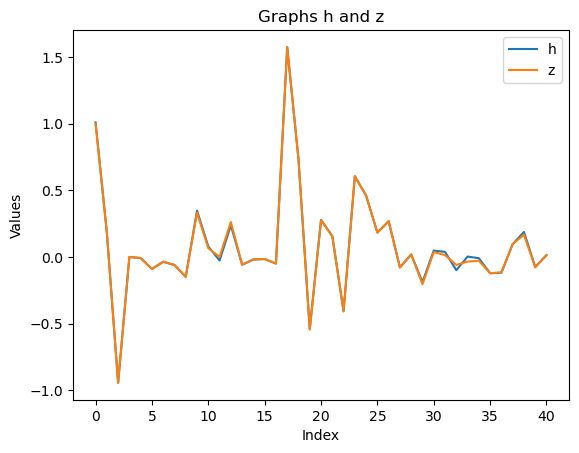

State:

 [[0.99316699]
 [0.95547882]
 [0.96512108]
 [0.96773294]
 [1.00264019]
 [0.9879781 ]
 [1.02855536]
 [0.96760773]
 [0.96558501]
 [0.97983333]
 [0.9850848 ]
 [0.97833236]
 [0.95270198]]


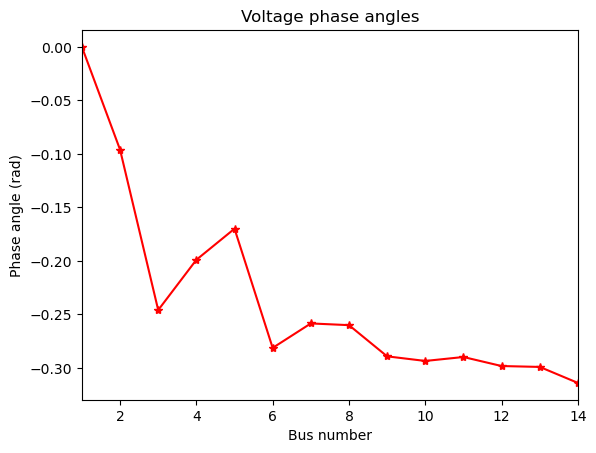

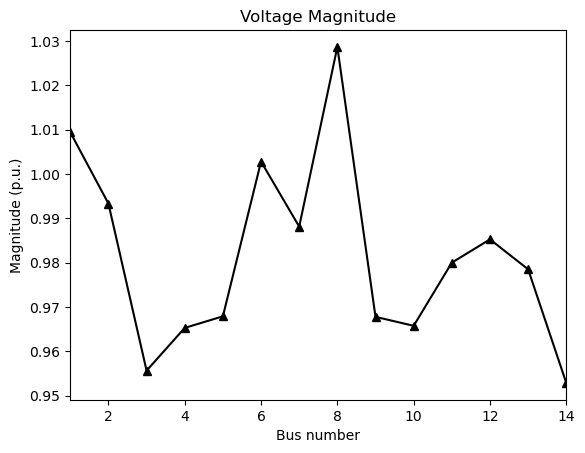

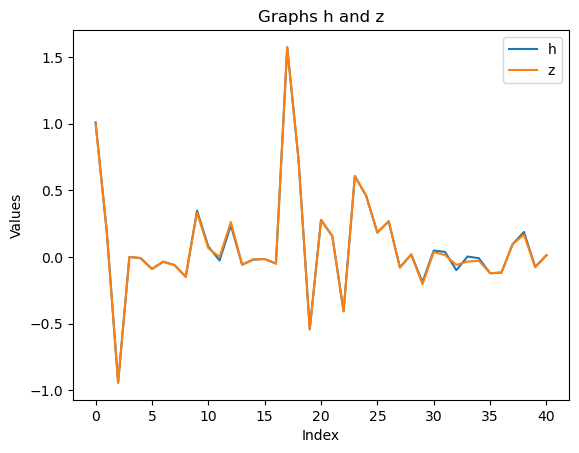

State:

 [[0.99331761]
 [0.95563801]
 [0.96527684]
 [0.96788764]
 [1.0027978 ]
 [0.98812199]
 [1.02865298]
 [0.96777133]
 [0.96574915]
 [0.97999521]
 [0.98524512]
 [0.97849356]
 [0.95286766]]


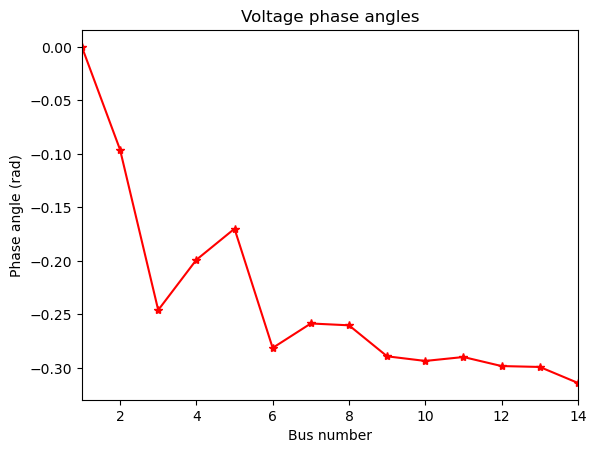

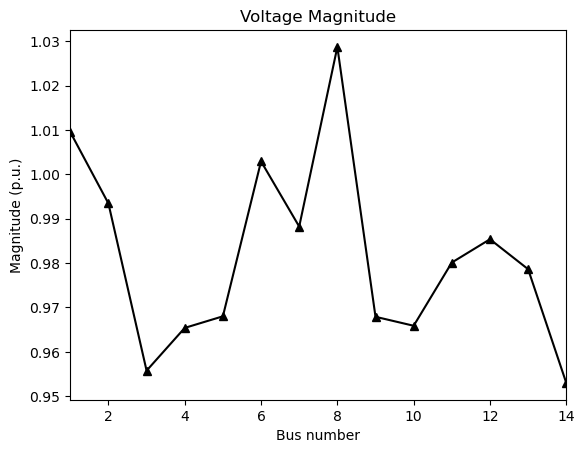

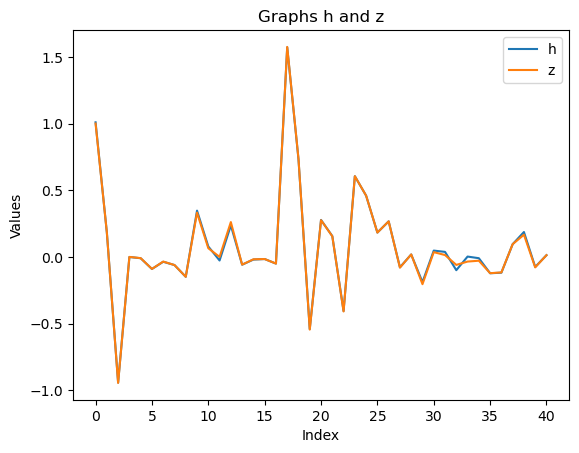

State:

 [[0.99343605]
 [0.95576366]
 [0.96539923]
 [0.96800902]
 [1.00292427]
 [0.98823085]
 [1.02871217]
 [0.96790154]
 [0.96588003]
 [0.98012489]
 [0.98537365]
 [0.9786227 ]
 [0.95299967]]


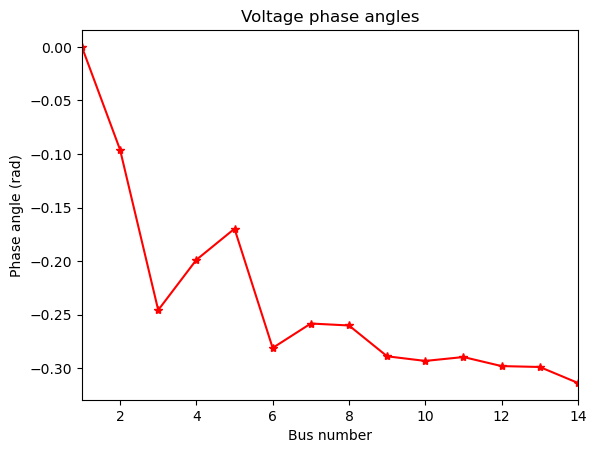

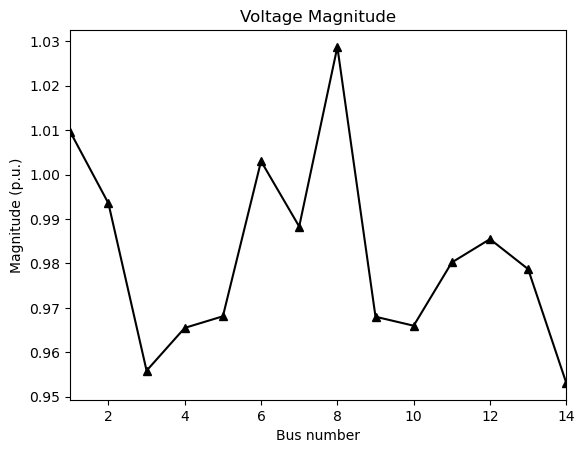

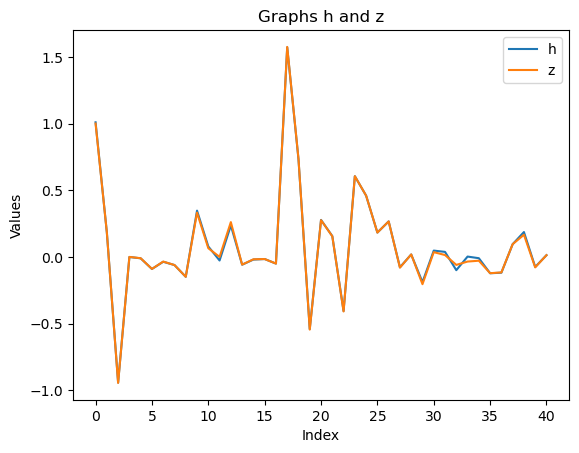

State:

 [[0.99352734]
 [0.95586123]
 [0.96549407]
 [0.96810277]
 [1.00302457]
 [0.98831139]
 [1.02874028]
 [0.96800566]
 [0.96598441]
 [0.98022789]
 [0.98547545]
 [0.97872486]
 [0.95310523]]


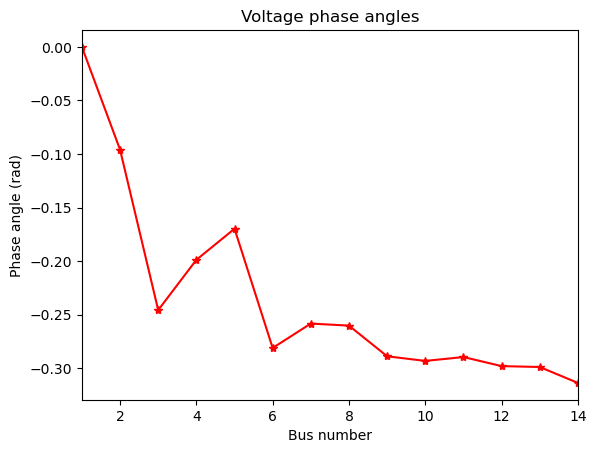

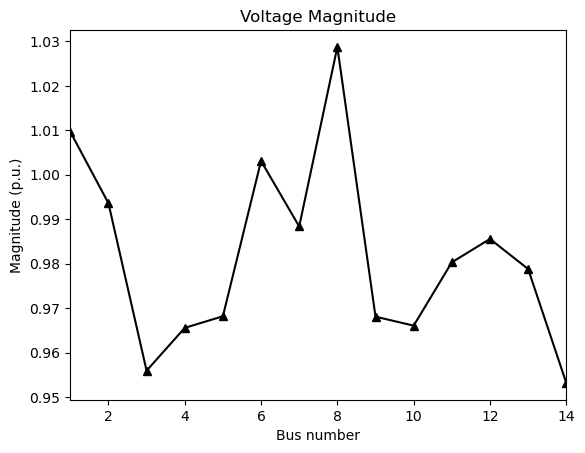

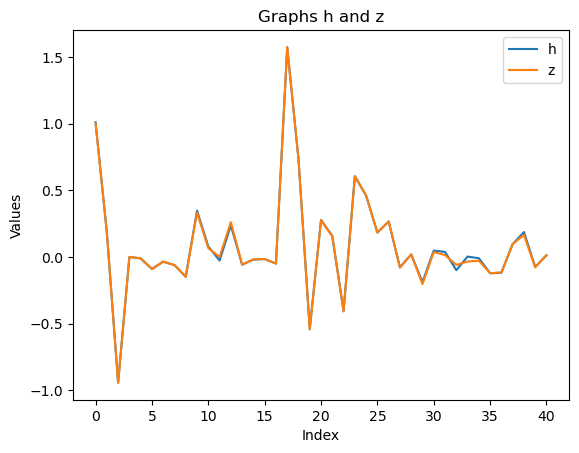

State:

 [[0.99359895]
 [0.95593893]
 [0.96556971]
 [0.96817746]
 [1.00310619]
 [0.98837096]
 [1.02874389]
 [0.96809001]
 [0.96606914]
 [0.98031177]
 [0.98555824]
 [0.97880797]
 [0.95319025]]


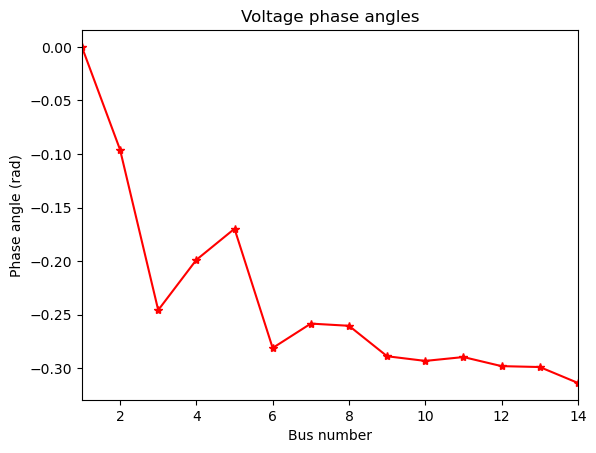

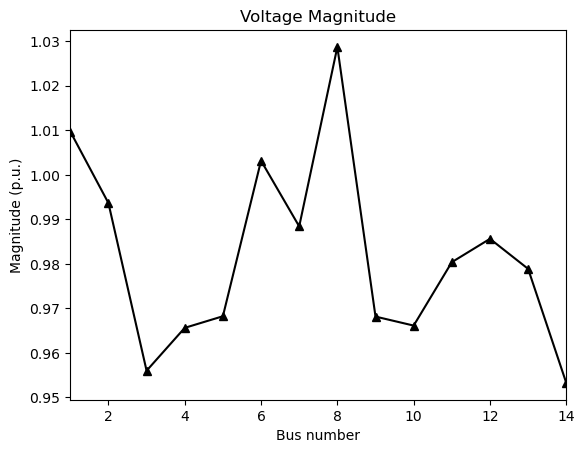

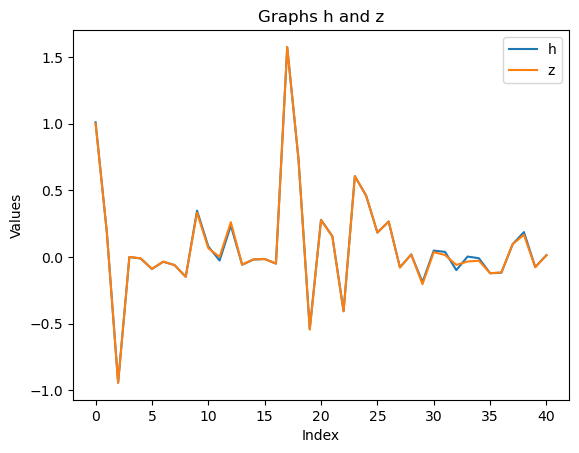

State:

 [[0.9936522 ]
 [0.95599766]
 [0.96562673]
 [0.96823343]
 [1.00317016]
 [0.98841108]
 [1.02872539]
 [0.96815659]
 [0.96613583]
 [0.98037755]
 [0.98562299]
 [0.97887294]
 [0.95325696]]


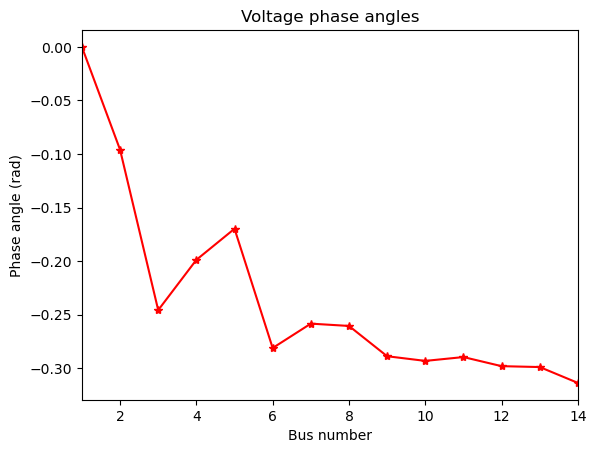

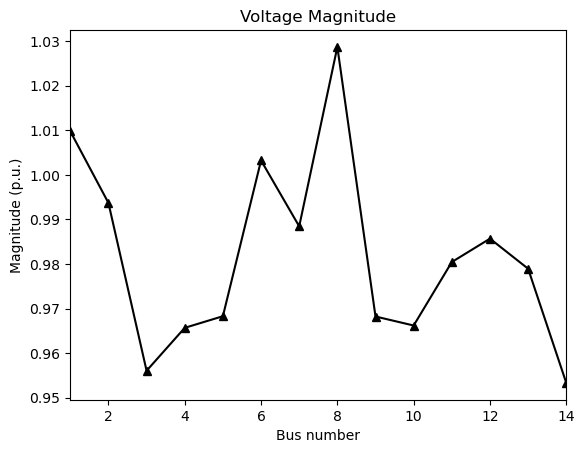

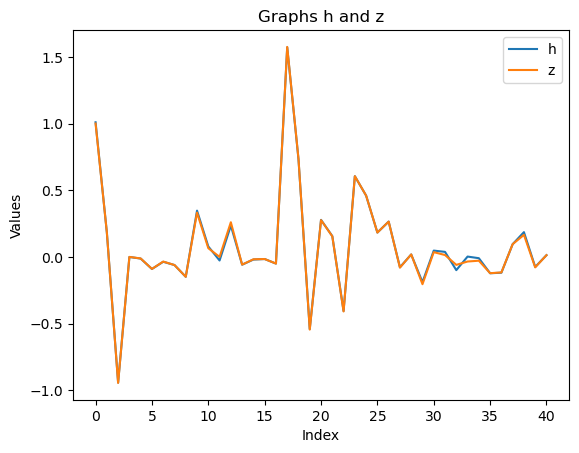

State:

 [[0.99369531]
 [0.95604568]
 [0.96567343]
 [0.96827909]
 [1.00322545]
 [0.98843906]
 [1.0286903 ]
 [0.96821298]
 [0.96619257]
 [0.98043418]
 [0.98567906]
 [0.97892952]
 [0.95331377]]


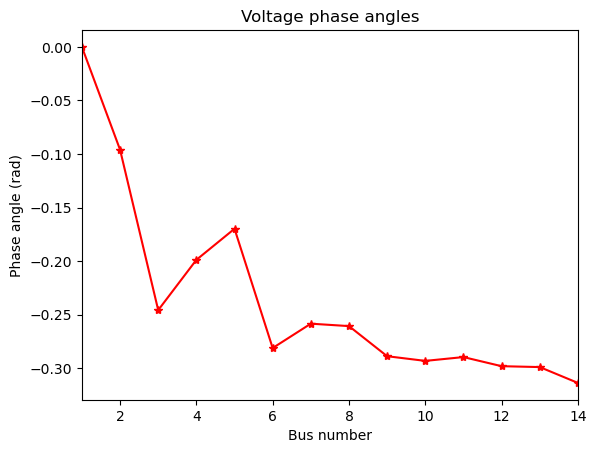

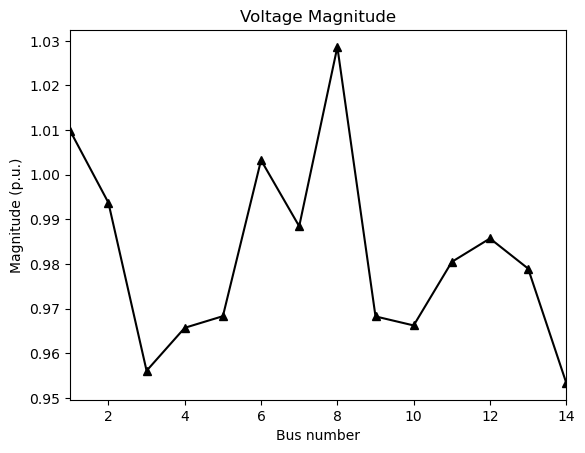

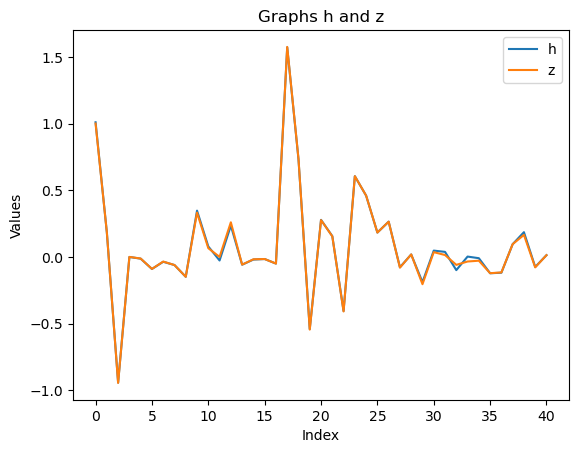

State:

 [[0.99372929]
 [0.95608449]
 [0.96571079]
 [0.96831555]
 [1.00327219]
 [0.98845625]
 [1.02864003]
 [0.96826061]
 [0.96624046]
 [0.98048194]
 [0.98572627]
 [0.97897671]
 [0.95336232]]


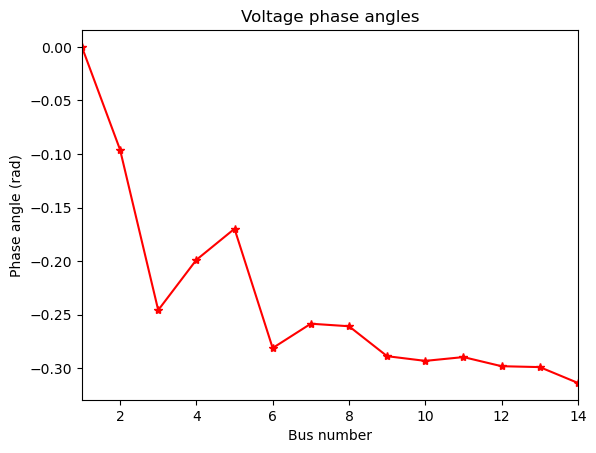

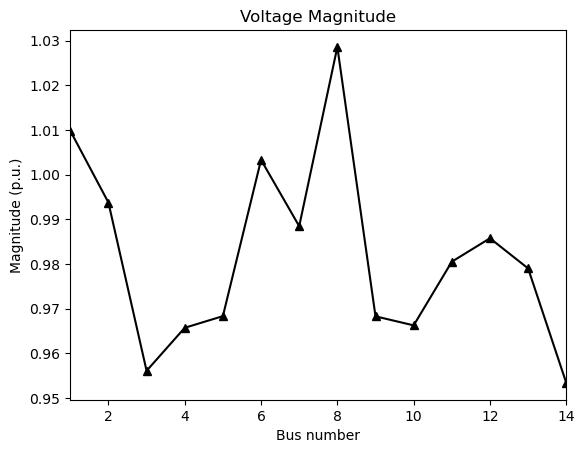

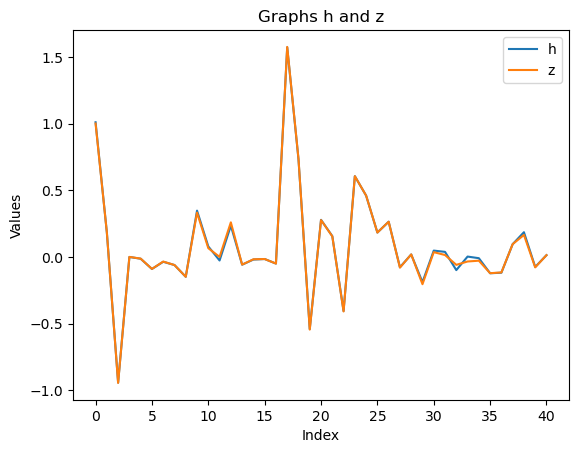

State:

 [[0.9937539 ]
 [0.95611349]
 [0.96573898]
 [0.96834273]
 [1.0033104 ]
 [0.98846353]
 [1.02857673]
 [0.96830027]
 [0.96628012]
 [0.98052121]
 [0.98576473]
 [0.97901529]
 [0.9534017 ]]


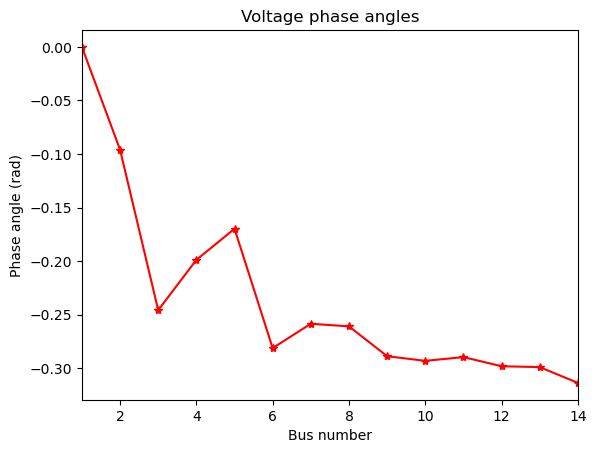

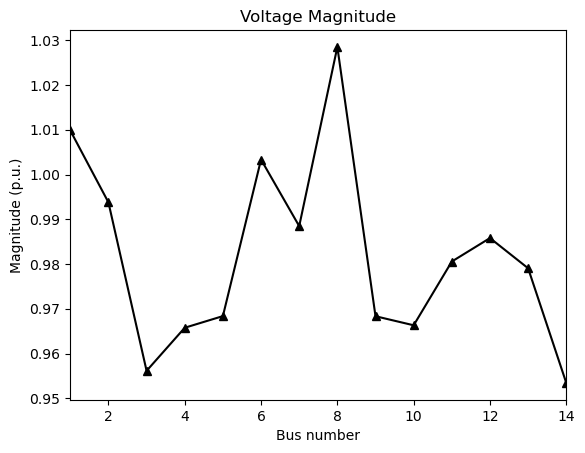

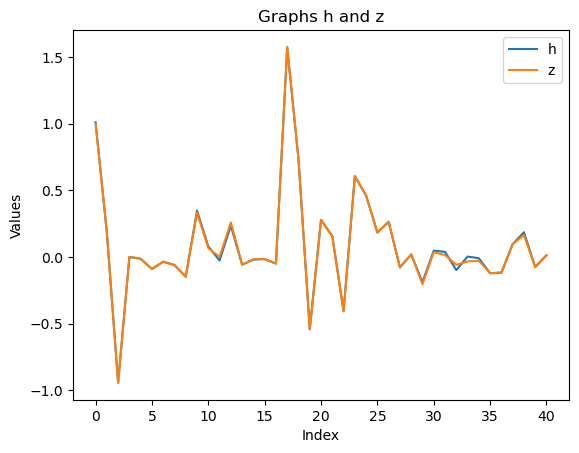

State:

 [[0.99377552]
 [0.95613935]
 [0.96576372]
 [0.96836645]
 [1.00334633]
 [0.98846558]
 [1.02850506]
 [0.9683357 ]
 [0.96631596]
 [0.98055759]
 [0.98580072]
 [0.97905129]
 [0.95343724]]


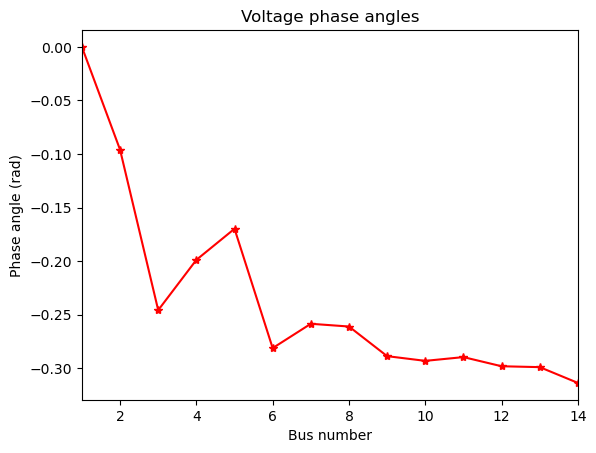

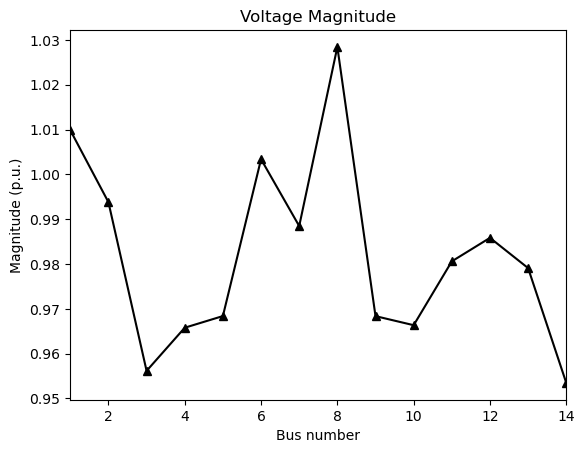

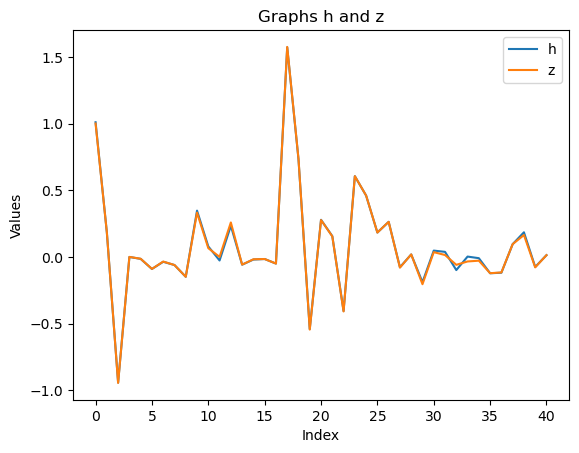

State:

 [[0.9937906 ]
 [0.95615868]
 [0.9657827 ]
 [0.96838442]
 [1.00337771]
 [0.98846104]
 [1.02842196]
 [0.96836747]
 [0.96634786]
 [0.98058955]
 [0.98583224]
 [0.97908272]
 [0.9534696 ]]


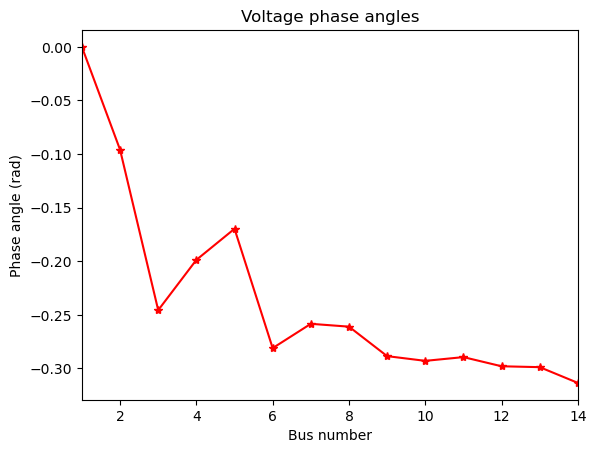

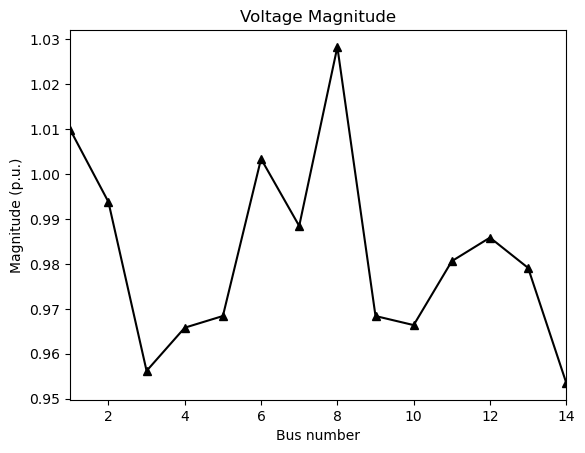

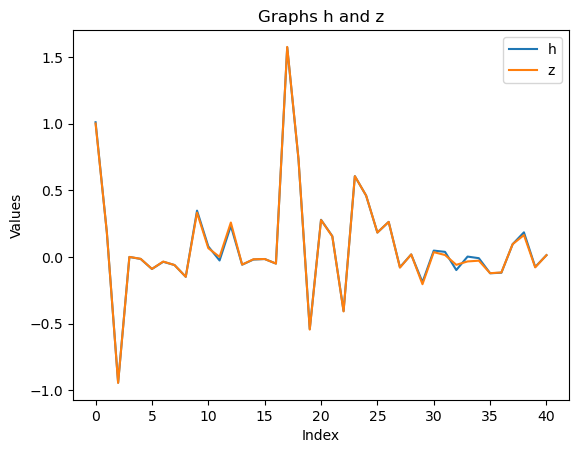

State:

 [[0.99380491]
 [0.95617654]
 [0.96579965]
 [0.96840079]
 [1.00340688]
 [0.98845299]
 [1.02833216]
 [0.96839687]
 [0.96637736]
 [0.9806192 ]
 [0.98586172]
 [0.97911255]
 [0.95349891]]


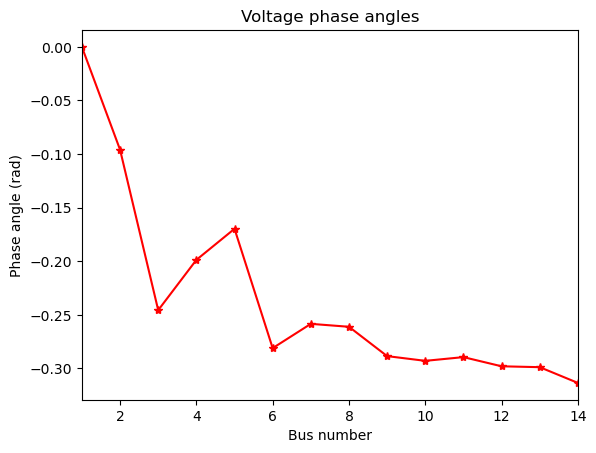

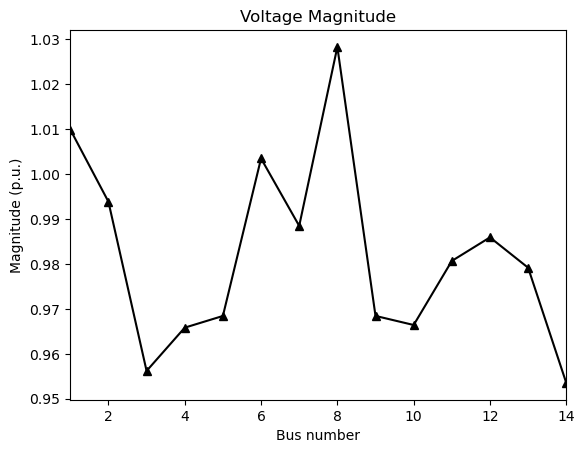

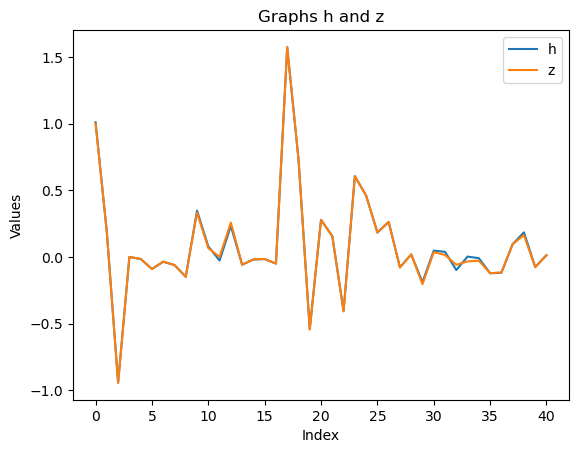

State:

 [[0.9938167 ]
 [0.95619189]
 [0.96581437]
 [0.96841452]
 [1.00343376]
 [0.98844159]
 [1.02823554]
 [0.96842478]
 [0.96640515]
 [0.98064681]
 [0.98588852]
 [0.97913935]
 [0.95352616]]


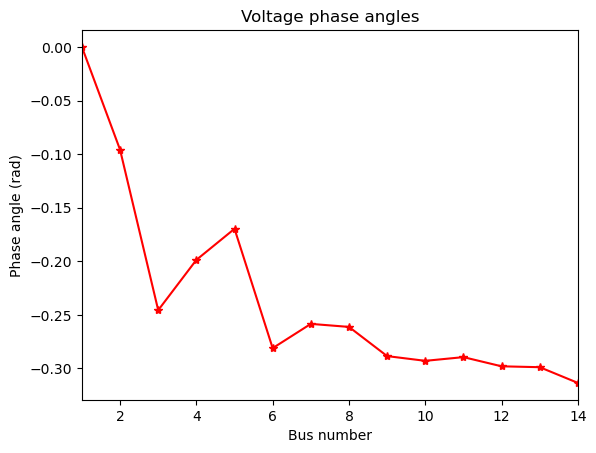

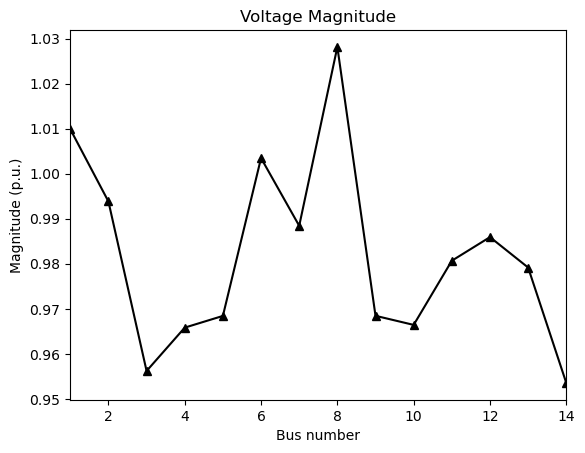

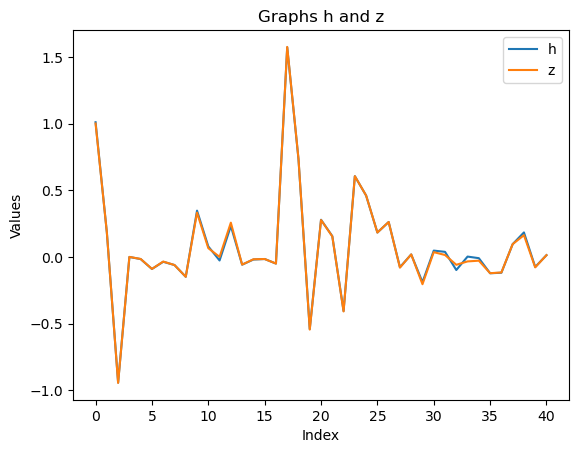

State:

 [[0.99382377]
 [0.95620287]
 [0.96582513]
 [0.96842428]
 [1.00345891]
 [0.98842529]
 [1.02813113]
 [0.96844905]
 [0.96642974]
 [0.98067211]
 [0.98591369]
 [0.97916436]
 [0.9535512 ]]


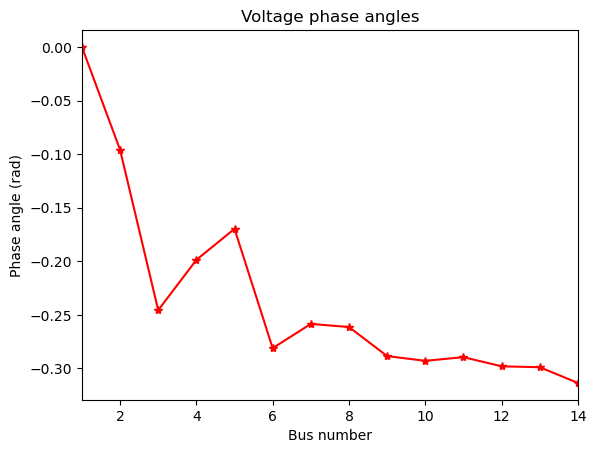

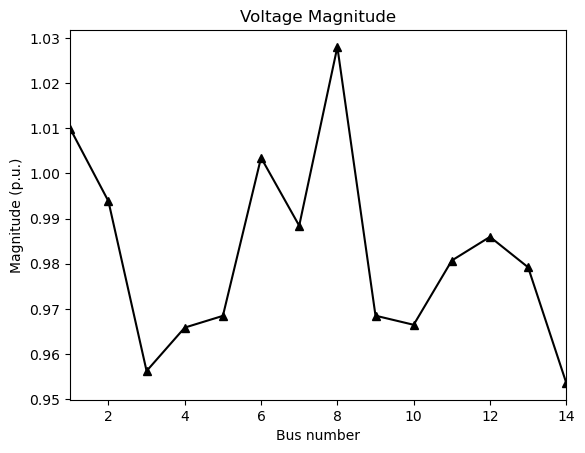

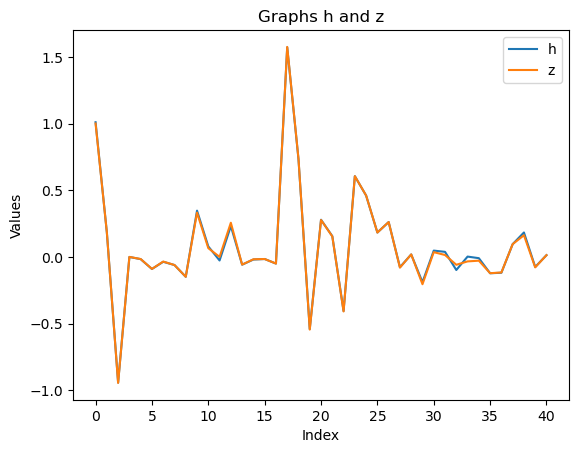

State:

 [[0.99383163]
 [0.95621408]
 [0.96583555]
 [0.96843412]
 [1.0034838 ]
 [0.9884075 ]
 [1.02802161]
 [0.9684737 ]
 [0.96645445]
 [0.98069719]
 [0.98593876]
 [0.97918975]
 [0.95357592]]


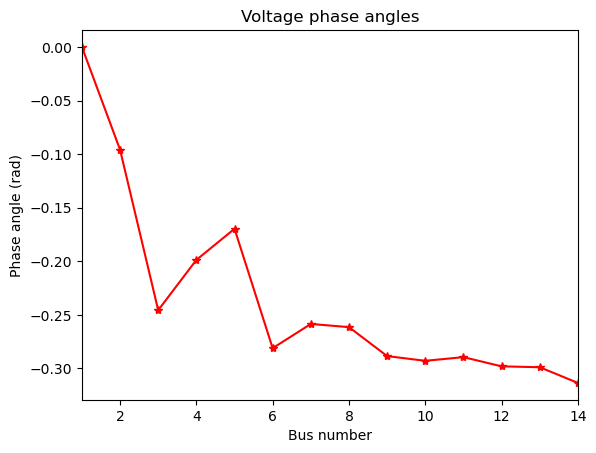

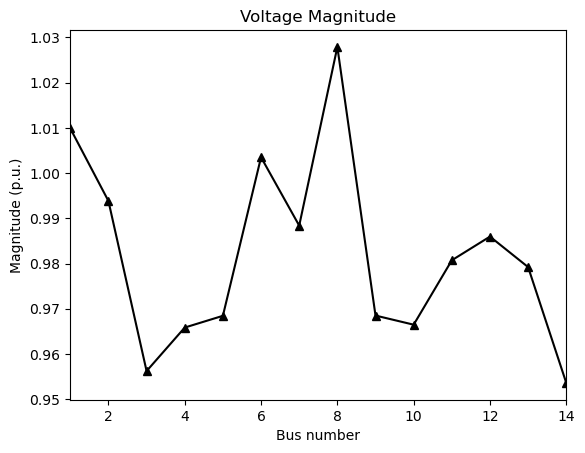

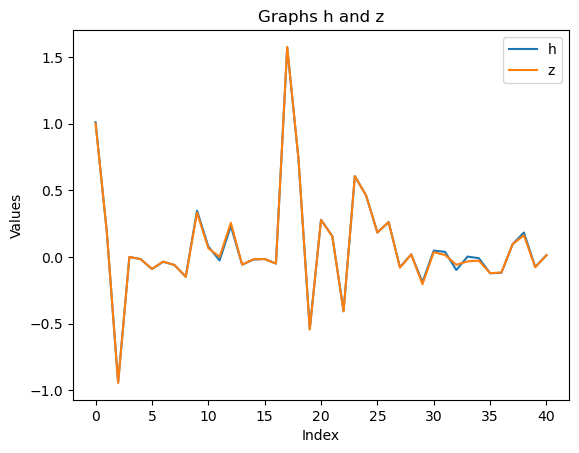

State:

 [[0.99383601]
 [0.95622191]
 [0.96584376]
 [0.96844177]
 [1.00350705]
 [0.98838662]
 [1.02790557]
 [0.96849726]
 [0.96647798]
 [0.98072088]
 [0.98596195]
 [0.97921284]
 [0.95359967]]


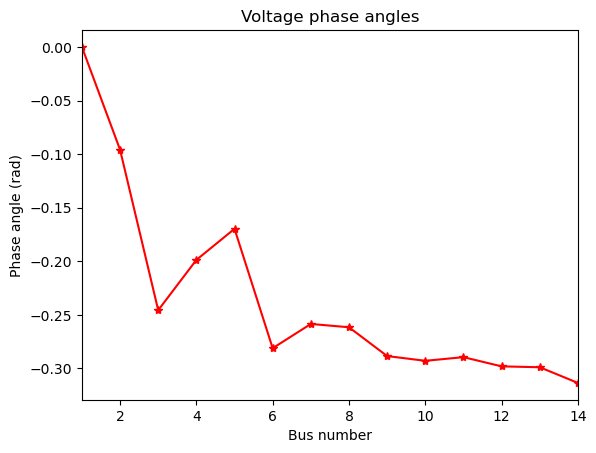

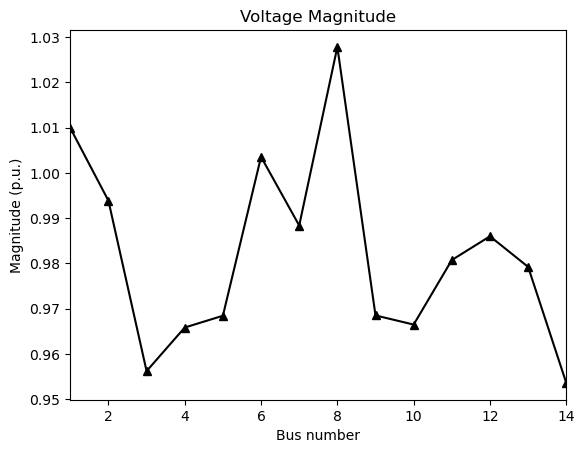

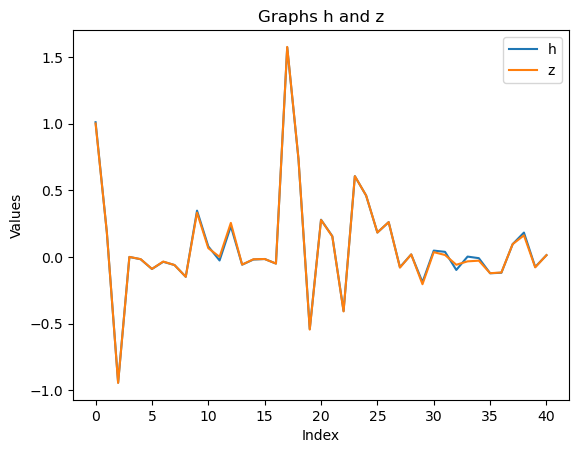

State:

 [[0.99384246]
 [0.95623127]
 [0.96585245]
 [0.96844946]
 [1.00353183]
 [0.98836467]
 [1.02778566]
 [0.96852021]
 [0.96650124]
 [0.98074524]
 [0.98598669]
 [0.97923742]
 [0.95362306]]


 Final State:

 [[0.99384246]
 [0.95623127]
 [0.96585245]
 [0.96844946]
 [1.00353183]
 [0.98836467]
 [1.02778566]
 [0.96852021]
 [0.96650124]
 [0.98074524]
 [0.98598669]
 [0.97923742]
 [0.95362306]]


In [17]:
Pi= pd.read_csv("Zdata_small.csv")
nbus=14;
Pi= Pi.to_numpy();
Pi=Pi;
num=14


# The main code for state estimation using EKF

V = np.ones((nbus,1)) # Initialize the bus voltages..
del1 = np.zeros((nbus,1)); # Initialize the bus angles..


ekf = ExtendedKalmanFilter(dim_x=27, dim_z=41)


initial_state = np.zeros((27, 1))  # Initial state vector
for i in range(14,27):
    initial_state[i]=1
initial_covariance = np.eye(27)*1 # Initial covariance matrix

ekf.x = initial_state
ekf.P = initial_covariance # Initial covariance matrix

ekf.Q =np.eye(27)# Process noise covariance matrix
ekf.R = np.eye(41) # Measurement noise covariance matrix
def f(x, dt):
    F = np.identity(27)
    return F @ x


for i in range (0,50):
    zdata = zdatas(i)
    z = zdata[:,2]
    
    
    ekf.HJacobian=HJacobian_at1
    ekf.h=Hx
    num_buses=14;
    ekf.F =np.identity(27);
    ekf.f=f
    
    ekf.predict()  # Prediction step using system dynamics function
    ekf.update(z,ekf.HJacobian,ekf.h)  # Update step using measurement function
    del1[1:] = ekf.x[0:nbus-1]
    V=ekf.x[nbus-1:]
    h1=Hx(ekf.x)
    r=z-h1



     # ++++++++++++++++++++++
    # Presenting the results
    # ===================


    plot.figure()
    plot.plot(range(1,nbus+1),del1,'-r*')
    plot.title('Voltage phase angles')
    plot.xlabel('Bus number')
    plot.ylabel('Phase angle (rad)')
    plot.xlim(1,nbus)

    plot.figure()
    plot.plot(range(1,nbus+1),V,'-k^')
    plot.title('Voltage Magnitude')
    plot.xlabel('Bus number')
    plot.ylabel('Magnitude (p.u.)')
    plot.xlim(1,nbus)
    plot.show()

    fig, ax = plot.subplots()
    ax.plot(h1, label='h')
    ax.plot(z, label='z')
    ax.set_title('Graphs h and z')             # Set the plot title and labels
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()                                # Add a legend
    plot.show()                                # Display the plot

    print("State:\n\n", ekf.x[14:])
    
    
print("\n\n Final State:\n\n", ekf.x[14:])




